Inputasi Data

In [ ]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt, seaborn as sns, numpy as np

try: # Running Locally, yakinkan "file_" berada di folder "data"
  dfJ = pd.read_csv("data/jakarta.csv")
  dfD = pd.read_csv("data/depok.csv")
  dfB = pd.read_csv("data/bogor.csv")
  dfT = pd.read_csv("data/tangerang.csv")
  dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
  !mkdir data
  !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
  !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
  !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
  !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
  !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
  dfJ = pd.read_csv("data/jakarta.csv")
  dfD = pd.read_csv("data/depok.csv")
  dfB = pd.read_csv("data/bogor.csv")
  dfT = pd.read_csv("data/tangerang.csv")
  dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape


((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

#Pengolahan Data Bogor

In [ ]:
dfB.head(15)


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06-12-2021,120.0,70.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,06-12-2021,125.0,125.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,06-12-2021,97.0,72.0,3.0,2.0,0.0,1.0,Cibinong,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,06-12-2021,72.0,33.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06-12-2021,60.0,30.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfB.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
#melakukan pengecekan tipe data kategori dan kolom yg "eror"
for i in dfB.columns:
    print(f'{i}: {dfB[i].nunique()}')

created_at: 7
LT: 73
LB: 67
KT: 7
KM: 6
garasi: 4
carport: 8
lokasi: 27
sertifikat: 3
listrik: 8
hadap: 7
harga: 147
URL: 186
deskripsi: 171
Unnamed: 14: 0
Unnamed: 15: 0
Unnamed: 16: 0
Unnamed: 17: 0
Unnamed: 18: 0
Unnamed: 19: 0
Unnamed: 20: 0
Unnamed: 21: 0
Unnamed: 22: 0
Unnamed: 23: 0
Unnamed: 24: 0
Unnamed: 25: 0


In [ ]:
#penghapusan kolom2 yang terjadi "eror"
dfB.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [ ]:
#penghapusan baris2 yang tidak memiliki nilai di tiap kolom yang ada
dfB.dropna(how='all', inplace=True)

In [ ]:
dfB.sample(5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
178,03-12-2021,168.0,200.0,5.0,2.0,0.0,1.0,Bogor Utara,SHM,1300.0,NaN,1.399000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dekat pintu tol, dekat RS.siloam, dekat kebun ..."
82,07-12-2021,108.0,69.0,3.0,2.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,7.950000e+08,https://www.rumah.com/listing-properti/dijual-...,Keamanan 24 jam
95,02-12-2021,72.0,65.0,2.0,1.0,0.0,1.0,Jonggol,SHGB,1300.0,Utara,3.250000e+08,https://www.rumah123.com/properti/bogor/hos927...,"Rumah siap huni, Lokasi strategis"
180,03-12-2021,67.0,45.0,2.0,1.0,0.0,1.0,Gunungsindur,SHM,1300.0,NaN,3.850000e+08,https://www.rumah.com/listing-properti/dijual-...,"20 menit ke stasiun rawabuntu, 20 menit dari e..."
94,02-12-2021,90.0,80.0,3.0,1.0,0.0,1.0,Jonggol,SHM,1300.0,NaN,4.180000e+08,https://www.rumah123.com/properti/bogor/hos927...,"Rumah siap huni, lokasi strategis dekat tol"


In [ ]:
#koreksi tipe data tiap kolom
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  193 non-null    object 
 1   LT          193 non-null    float64
 2   LB          193 non-null    float64
 3   KT          193 non-null    float64
 4   KM          193 non-null    float64
 5   garasi      193 non-null    float64
 6   carport     193 non-null    float64
 7   lokasi      193 non-null    object 
 8   sertifikat  193 non-null    object 
 9   listrik     193 non-null    float64
 10  hadap       19 non-null     object 
 11  harga       193 non-null    float64
 12  URL         193 non-null    object 
 13  deskripsi   193 non-null    object 
dtypes: float64(8), object(6)
memory usage: 22.6+ KB


In [ ]:
#melihat keunikan masing2 varibael
for i in dfB.columns:
    print(f'{i}: {dfB[i].nunique()}')

created_at: 7
LT: 73
LB: 67
KT: 7
KM: 6
garasi: 4
carport: 8
lokasi: 27
sertifikat: 3
listrik: 8
hadap: 7
harga: 147
URL: 186
deskripsi: 171


In [ ]:
#melakukan pengecekan data duplikasi
print(dfB.shape)
jumlah = 0
indeks = []
for i in dfB.duplicated():
    if i == True:
        jumlah += 1
        print(i)
print(jumlah)

(193, 14)
0


In [ ]:
dfB.loc[[i==True for i in dfB.duplicated()]]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi


In [ ]:
#mengubah tipe data
dfB['created_at'] = pd.to_datetime(dfB['created_at'], format='%d-%m-%Y')
dfB['sertifikat'] = dfB['sertifikat'].astype('category')
dfB['hadap'] = dfB['hadap'].astype('category')
dfB['listrik'] = dfB['listrik'].astype('int')
dfB['listrik'] = dfB['listrik'].astype('category')
dfB['LT'] = dfB['LT'].astype('int')
dfB['LT'] = dfB['LT'].astype('int')
dfB['LB'] = dfB['LB'].astype('int')
dfB['KT'] = dfB['KT'].astype('int')
dfB['KM'] = dfB['KM'].astype('int')
dfB['garasi'] = dfB['garasi'].astype('int')
dfB['carport'] = dfB['carport'].astype('int')
dfB['harga'] = dfB['harga'].astype('int')

dfB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  193 non-null    datetime64[ns]
 1   LT          193 non-null    int64         
 2   LB          193 non-null    int64         
 3   KT          193 non-null    int64         
 4   KM          193 non-null    int64         
 5   garasi      193 non-null    int64         
 6   carport     193 non-null    int64         
 7   lokasi      193 non-null    object        
 8   sertifikat  193 non-null    category      
 9   listrik     193 non-null    category      
 10  hadap       19 non-null     category      
 11  harga       193 non-null    int64         
 12  URL         193 non-null    object        
 13  deskripsi   193 non-null    object        
dtypes: category(3), datetime64[ns](1), int64(7), object(3)
memory usage: 19.5+ KB


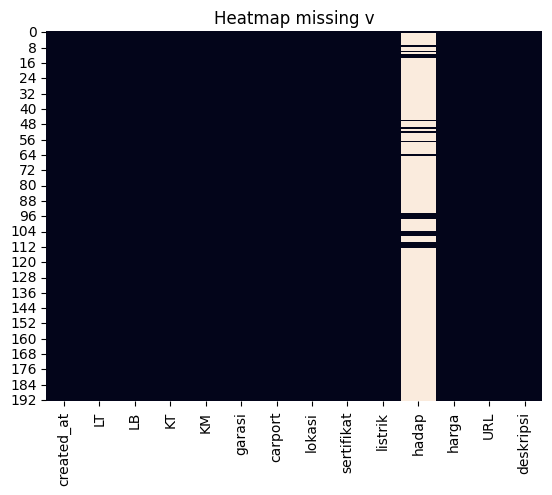

In [ ]:
sns.heatmap(dfB.isnull(), cbar=False)
plt.title('Heatmap missing v')
plt.show()

In [ ]:
dfB['hadap'].isnull()
dfB.loc[[i!=True for i in dfB['hadap'].isnull()]]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-03,75,38,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
7,2021-12-06,97,72,3,2,0,1,Cibinong,SHM,2200,Selatan,1230000000,https://www.rumah123.com/properti/bogor/hos920...,"Berada dalam kawasan Pemda, Hanya 5menit ke C..."
10,2021-12-06,312,70,4,2,1,1,Tanah Sareal,SHM,2200,Timur,250000000,https://www.rumah123.com/properti/bogor/hos892...,"Dekat lapangan Tenis dan mesjid, 10 menit pint..."
12,2021-12-06,112,129,3,3,0,0,Gunung Putri,SHGB,3500,Selatan,1800000000,https://www.rumah123.com/properti/bogor/hos820...,Cluster Nashville ini dekat dengan beberapa fa...
13,2021-12-06,60,50,2,1,0,0,Babakan Madang,SHM,2200,Selatan,850000000,https://www.rumah123.com/properti/bogor/hos922...,"0 KM dari exit toll Babakan Madang., 5 menit G..."
46,2021-12-06,167,300,4,3,2,0,Gunung Putri,SHM,5500,"Timur, Utara",3200000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat Water Splash CIbubur Country, 10 menit k..."
50,2021-12-06,200,202,5,5,2,2,Gunung Putri,SHM,4400,"Selatan, Utara",3128000000,https://www.rumah.com/listing-properti/dijual-...,"One gate system, keamanan 24 jam, fasilitas le..."
52,2021-12-06,162,164,5,5,0,2,Gunung Putri,SHM,3500,Utara,2536000000,https://www.rumah.com/listing-properti/dijual-...,"Fasilitas lengkap , dekat dengan fasilitas kom..."
57,2021-12-07,112,169,5,5,0,2,Gunung Putri,SHM,3500,Danau,2128000000,https://www.rumah.com/listing-properti/dijual-...,Fasilitas lengkap
64,2021-12-07,120,160,5,3,0,1,Cileungsi,SHM,2200,Barat,1250000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni, bebas banjir, fasilitas lengk..."


In [ ]:
#checking data (nosie dan outlier) melalui statistik deskriptif
dfB.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
created_at,193,NaN,NaN,NaN,2021-12-04 15:17:43.212435200,2021-12-01 00:00:00,2021-12-03 00:00:00,2021-12-05 00:00:00,2021-12-06 00:00:00,2021-12-07 00:00:00,NaN
LT,193.0,NaN,NaN,NaN,143.57513,30.0,66.0,84.0,120.0,1500.0,191.576208
LB,193.0,NaN,NaN,NaN,98.663212,21.0,36.0,58.0,90.0,1200.0,125.851746
KT,193.0,NaN,NaN,NaN,2.694301,1.0,2.0,2.0,3.0,8.0,1.110939
KM,193.0,NaN,NaN,NaN,1.797927,1.0,1.0,1.0,2.0,6.0,1.175087
garasi,193.0,NaN,NaN,NaN,0.15544,0.0,0.0,0.0,0.0,3.0,0.485931
carport,193.0,NaN,NaN,NaN,1.310881,0.0,1.0,1.0,1.0,8.0,0.905271
lokasi,193,27,Gunung Putri,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,193,3,SHM,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,193.0,8.0,1300.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


terlihat terdapat NOISE pada kolom harga (seharusnya tidak mungkin terjadi negatif)

In [ ]:
#membuang noise
dfB = dfB[dfB['harga'] > 0]
dfB.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
created_at,193,NaN,NaN,NaN,2021-12-04 15:17:43.212435200,2021-12-01 00:00:00,2021-12-03 00:00:00,2021-12-05 00:00:00,2021-12-06 00:00:00,2021-12-07 00:00:00,NaN
LT,193.0,NaN,NaN,NaN,143.57513,30.0,66.0,84.0,120.0,1500.0,191.576208
LB,193.0,NaN,NaN,NaN,98.663212,21.0,36.0,58.0,90.0,1200.0,125.851746
KT,193.0,NaN,NaN,NaN,2.694301,1.0,2.0,2.0,3.0,8.0,1.110939
KM,193.0,NaN,NaN,NaN,1.797927,1.0,1.0,1.0,2.0,6.0,1.175087
garasi,193.0,NaN,NaN,NaN,0.15544,0.0,0.0,0.0,0.0,3.0,0.485931
carport,193.0,NaN,NaN,NaN,1.310881,0.0,1.0,1.0,1.0,8.0,0.905271
lokasi,193,27,Gunung Putri,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,193,3,SHM,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,193.0,8.0,1300.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-17-58a1a8be6e01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(dfB['harga'], kde=True, rug=True)


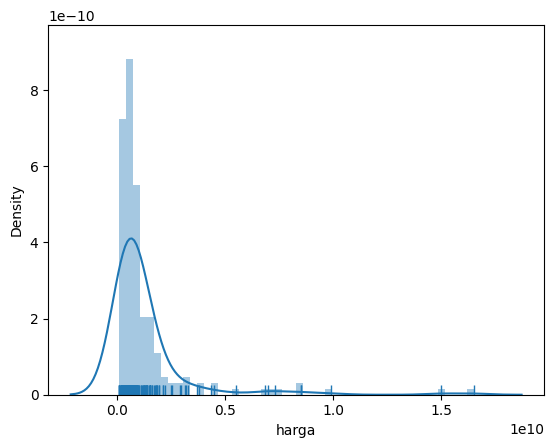

In [ ]:
p = sns.distplot(dfB['harga'], kde=True, rug=True)

<Axes: xlabel='harga'>

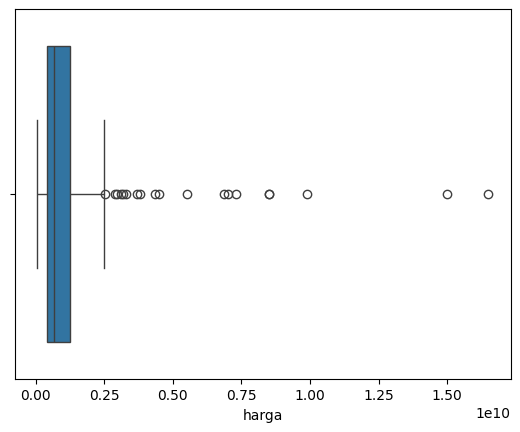

In [ ]:
sns.boxplot(x='harga', data=dfB)

In [ ]:
a = np.abs(dfB.harga - dfB.harga.mean()) <= (2*dfB.harga.std())
print(a.shape)
a.head()

(193,)


,harga
0,True
1,True
2,True
3,True
4,True


In [ ]:
dfB_Clean = dfB[a]
dfB_Outlier = dfB[~a]
print(dfB_Clean.shape, dfB_Outlier.shape, dfB.shape)

(185, 14) (8, 14) (193, 14)


<ipython-input-21-078dec3ddbc1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(dfB_Clean['harga'], kde=True, rug=True)


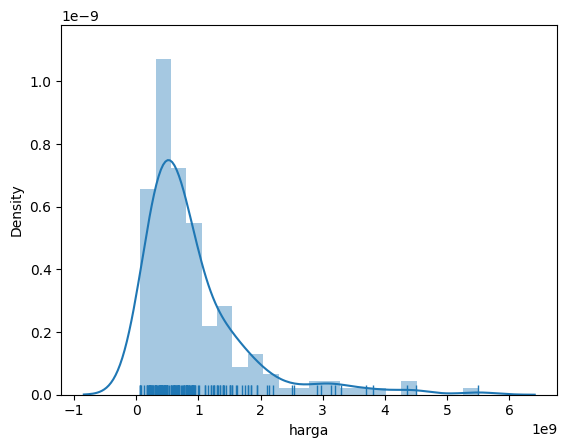

In [ ]:
p = sns.distplot(dfB_Clean['harga'], kde=True, rug=True)

<Axes: xlabel='harga'>

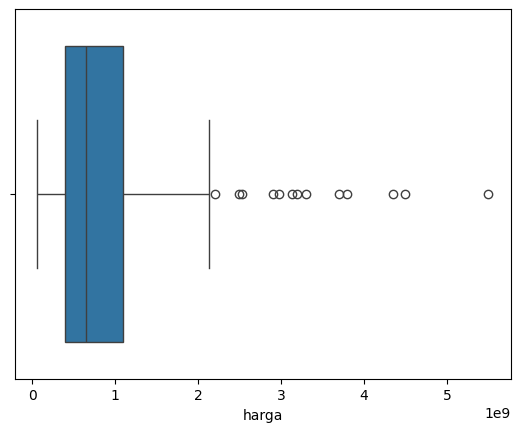

In [ ]:
sns.boxplot(x='harga', data=dfB_Clean)

In [ ]:
dfB_Clean.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
created_at,185,2021-12-04 16:20:45.405405440,2021-12-01 00:00:00,2021-12-03 00:00:00,2021-12-05 00:00:00,2021-12-06 00:00:00,2021-12-07 00:00:00,NaN
LT,185.0,108.756757,30.0,66.0,79.0,120.0,470.0,73.636152
LB,185.0,80.589189,21.0,36.0,55.0,80.0,500.0,72.256893
KT,185.0,2.589189,1.0,2.0,2.0,3.0,6.0,0.963402
KM,185.0,1.654054,1.0,1.0,1.0,2.0,5.0,0.943685
garasi,185.0,0.108108,0.0,0.0,0.0,0.0,2.0,0.374731
carport,185.0,1.227027,0.0,1.0,1.0,1.0,7.0,0.693388
harga,185.0,915117699.248649,65000000.0,395000000.0,650000000.0,1100000000.0,5500000000.0,861329188.117032


In [ ]:
dfB['letak_kota'] = 'Bogor'

dfB.reset_index(inplace=True)
dfB_Clean.reset_index(inplace=True)
dfB_Outlier.reset_index(inplace=True)

dfB.drop(columns='index', inplace=True)
dfB_Clean.drop(columns='index', inplace=True)
dfB_Outlier.drop(columns='index', inplace=True)

<ipython-input-24-5cc03690ad87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB_Clean.drop(columns='index', inplace=True)
<ipython-input-24-5cc03690ad87>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB_Outlier.drop(columns='index', inplace=True)


In [ ]:
dfB.to_csv('data/dFB_Ori.csv', encoding='utf8')
dfB_Clean.to_csv('data/dFB_Clean.csv', encoding='utf8')
dfB_Outlier.to_csv('data/dFB_Outlier.csv', encoding='utf8')

In [ ]:
dfB.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'letak_kota'],
      dtype='object')

In [ ]:
dfB.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
created_at,193,NaN,NaN,NaN,2021-12-04 15:17:43.212435200,2021-12-01 00:00:00,2021-12-03 00:00:00,2021-12-05 00:00:00,2021-12-06 00:00:00,2021-12-07 00:00:00,NaN
LT,193.0,NaN,NaN,NaN,143.57513,30.0,66.0,84.0,120.0,1500.0,191.576208
LB,193.0,NaN,NaN,NaN,98.663212,21.0,36.0,58.0,90.0,1200.0,125.851746
KT,193.0,NaN,NaN,NaN,2.694301,1.0,2.0,2.0,3.0,8.0,1.110939
KM,193.0,NaN,NaN,NaN,1.797927,1.0,1.0,1.0,2.0,6.0,1.175087
garasi,193.0,NaN,NaN,NaN,0.15544,0.0,0.0,0.0,0.0,3.0,0.485931
carport,193.0,NaN,NaN,NaN,1.310881,0.0,1.0,1.0,1.0,8.0,0.905271
lokasi,193,27,Gunung Putri,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,193,3,SHM,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,193.0,8.0,1300.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


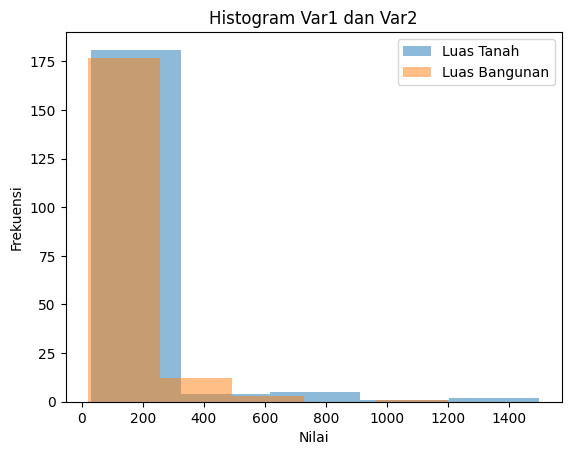

In [ ]:
plt.hist(dfB['LT'], alpha=0.5, label='Luas Tanah', bins=5)
plt.hist(dfB['LB'], alpha=0.5, label='Luas Bangunan', bins=5)

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Var1 dan Var2')
plt.legend()

plt.show()

In [ ]:
print(dfB[dfB['LT'] <= 150]['LT'].count(), dfB[dfB['LT'] <= 150]['LT'].count()/dfB['LT'].count())
print(dfB[dfB['LB'] <= 100]['LB'].count(), dfB[dfB['LB'] <= 100]['LB'].count()/dfB['LB'].count())

153 0.7927461139896373
150 0.7772020725388601


In [ ]:
total_sisa = 0
banyak_sisa = 0
for i in range(dfB.shape[0]):
    cek = dfB['LT'][i] - dfB['LB'][i]
    if cek > 150:
        total_sisa += cek
        banyak_sisa += 1
        print(f'baris ke: {i} - sisa: {cek}')
print(f'\nterdapat {banyak_sisa} rumah dengan dengan sisa tanah > 0 \ndengan rata2 sisa tanah {(total_sisa)/banyak_sisa}')

baris ke: 10 - sisa: 242
baris ke: 26 - sisa: 300
baris ke: 27 - sisa: 349
baris ke: 37 - sisa: 772
baris ke: 100 - sisa: 400
baris ke: 101 - sisa: 160
baris ke: 108 - sisa: 217
baris ke: 109 - sisa: 296
baris ke: 111 - sisa: 348
baris ke: 145 - sisa: 210
baris ke: 173 - sisa: 230
baris ke: 174 - sisa: 775

terdapat 12 rumah dengan dengan sisa tanah > 0 
dengan rata2 sisa tanah 358.25


In [ ]:
dfB.loc[(10, 89, 153), :]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
10,2021-12-06,312,70,4,2,1,1,Tanah Sareal,SHM,2200,Timur,250000000,https://www.rumah123.com/properti/bogor/hos892...,"Dekat lapangan Tenis dan mesjid, 10 menit pint...",Bogor
89,2021-12-07,60,39,2,1,0,1,Parung,SHGB,2200,NaN,633150000,https://www.rumah.com/listing-properti/dijual-...,"Rumah modern dikawasan hijau, dekat 3 tol",Bogor
153,2021-12-05,72,36,2,1,0,1,Parung,SHGB,1300,NaN,201600000,https://www.rumah.com/listing-properti/dijual-...,"Keamanan 24 jam, CCTV, terdapat taman bermain ...",Bogor


In [ ]:
dfB[dfB['lokasi'] == 'Cileungsi']

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
26,2021-12-06,1500,1200,8,6,0,8,Cileungsi,SHM,17600,NaN,9900000000,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob...",Bogor
53,2021-12-07,72,65,3,2,0,1,Cileungsi,SHM,1300,NaN,750000000,https://www.rumah.com/listing-properti/dijual-...,Keamanan 24 jam,Bogor
64,2021-12-07,120,160,5,3,0,1,Cileungsi,SHM,2200,Barat,1250000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni, bebas banjir, fasilitas lengk...",Bogor
97,2021-12-02,60,72,2,1,0,1,Cileungsi,SHGB,1300,Timur,215000000,https://www.rumah123.com/properti/bogor/hos927...,"Fasilitas masjid, taman, jogging track, keamanan",Bogor
106,2021-12-02,72,55,2,1,0,1,Cileungsi,SHGB,1300,Selatan,295000000,https://www.rumah123.com/properti/bogor/hos927...,"Fasilitas masjid, taman, jogging track, keamanan",Bogor
112,2021-12-02,72,55,2,1,1,1,Cileungsi,SHGB,1300,Barat,295000000,https://www.rumah123.com/properti/bogor/hos927...,"Fasilitas masjid, taman, jogging track, keamanan",Bogor
136,2021-12-04,90,36,2,1,0,1,Cileungsi,SHM,1300,NaN,498000000,https://www.rumah.com/listing-properti/dijual-...,Strategis di akses utama Cibubur-Cileungsi,Bogor
165,2021-12-05,66,32,2,1,0,1,Cileungsi,SHGB,1300,NaN,316800000,https://www.rumah.com/listing-properti/dijual-...,"Bebas banjir, terdapat taman pribadi",Bogor
167,2021-12-05,90,69,2,2,0,1,Cileungsi,SHM,2200,NaN,678700000,https://www.rumah.com/listing-properti/dijual-...,"Rumah 2 lantai, dekat dengan pasar",Bogor
170,2021-12-05,75,80,3,2,0,1,Cileungsi,SHM,2200,NaN,950000000,https://www.rumah.com/listing-properti/dijual-...,"Dilalui angkutan umum, dekat dengan rumah sakit",Bogor


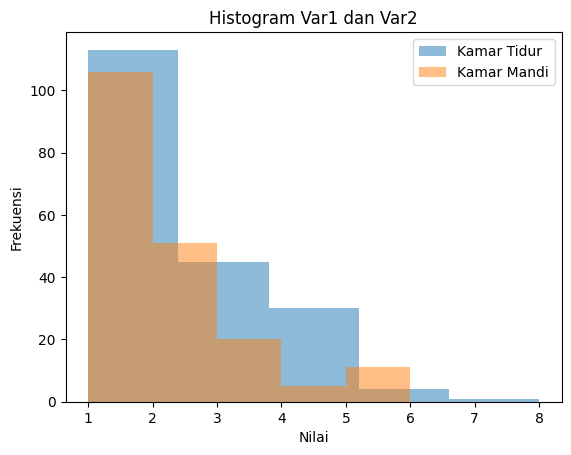

In [ ]:
plt.hist(dfB['KT'], alpha=0.5, label='Kamar Tidur', bins=5)
plt.hist(dfB['KM'], alpha=0.5, label='Kamar Mandi', bins=5)

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Var1 dan Var2')
plt.legend()

plt.show()

In [ ]:
print(dfB[dfB['KM'] <= 3]['KM'].count(), dfB[dfB['KM'] <= 3]['KM'].count()/dfB['KM'].count())
print(dfB[dfB['KT'] <= 3]['KT'].count(), dfB[dfB['KT'] <= 3]['KT'].count()/dfB['KT'].count())

177 0.917098445595855
158 0.8186528497409327


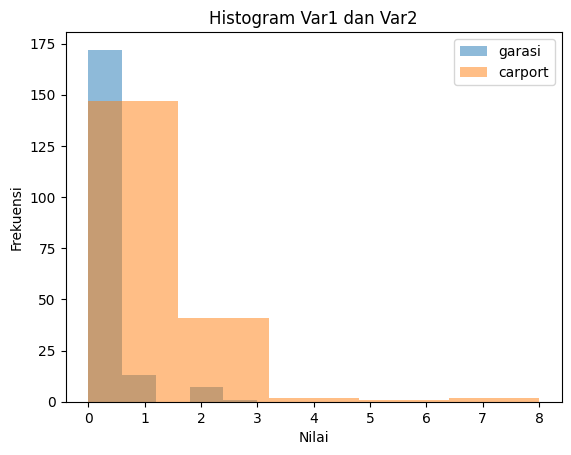

In [ ]:
plt.hist(dfB['garasi'], alpha=0.5, label='garasi', bins=5)
plt.hist(dfB['carport'], alpha=0.5, label='carport', bins=5)

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Var1 dan Var2')
plt.legend()

plt.show()

In [ ]:
for i in dfB['garasi'].unique():
    print(f'slot garasi {i}:', dfB[dfB['garasi'] == i]['garasi'].count(), ':', 100*dfB[dfB['garasi'] == i]['garasi'].count()/dfB['garasi'].count())
print('\n')
for i in dfB['carport'].unique():
    print(f'slot carport {i}:', dfB[dfB['carport'] == i]['carport'].count(), ':', 100*dfB[dfB['carport'] == i]['carport'].count()/dfB['carport'].count())

slot garasi 1: 13 : 6.7357512953367875
slot garasi 0: 172 : 89.11917098445596
slot garasi 2: 7 : 3.626943005181347
slot garasi 3: 1 : 0.5181347150259067


slot carport 1: 140 : 72.53886010362694
slot carport 2: 38 : 19.689119170984455
slot carport 0: 7 : 3.626943005181347
slot carport 3: 3 : 1.5544041450777202
slot carport 8: 1 : 0.5181347150259067
slot carport 7: 1 : 0.5181347150259067
slot carport 4: 2 : 1.0362694300518134
slot carport 5: 1 : 0.5181347150259067


In [ ]:
for i in dfB.columns[8:11]:
    for j in dfB[i].unique():
        print(f'{i} {j}:', dfB[dfB[i] == j][i].count(), ':', 100*dfB[dfB[i] == j][i].count()/dfB[i].count())
    print('\n')

sertifikat SHM: 155 : 80.31088082901555
sertifikat SHGB: 33 : 17.098445595854923
sertifikat Lainnya: 5 : 2.5906735751295336


listrik 1300: 100 : 51.81347150259067
listrik 2200: 68 : 35.233160621761655
listrik 3500: 8 : 4.1450777202072535
listrik 17600: 1 : 0.5181347150259067
listrik 900: 2 : 1.0362694300518134
listrik 5500: 9 : 4.66321243523316
listrik 4400: 4 : 2.0725388601036268
listrik 6600: 1 : 0.5181347150259067


hadap Barat: 3 : 15.789473684210526
hadap nan: 0 : 0.0
hadap Selatan: 5 : 26.31578947368421
hadap Timur: 5 : 26.31578947368421
hadap Timur, Utara: 1 : 5.2631578947368425
hadap Selatan, Utara: 1 : 5.2631578947368425
hadap Utara: 3 : 15.789473684210526
hadap Danau: 1 : 5.2631578947368425




In [ ]:
dfB[dfB['harga'] >= 1000000000].sort_values(by = 'harga')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
15,2021-12-06,120,90,5,3,0,3,Bogor Barat,SHM,2200,NaN,1000000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat Perumahan Taman Yasmin, Dekat Tol Nilai ...",Bogor
3,2021-12-06,60,70,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
177,2021-12-03,105,126,3,2,0,1,Bogor Utara,SHM,2200,NaN,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Deka mall Botani Square, dekat RS.Siloam, deka...",Bogor
176,2021-12-03,78,198,6,3,0,2,Tanah Sareal,SHM,2200,NaN,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Sport center, Marcopolo waterpark",Bogor
159,2021-12-05,131,90,2,2,0,1,Babakan Madang,Lainnya,2200,NaN,1150000000,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni di Cluster Favorit Babakan Madang,Bogor
190,2021-12-03,210,150,4,2,1,1,Bogor Selatan,SHM,2200,NaN,1200000000,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota,Bogor
4,2021-12-06,90,60,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
7,2021-12-06,97,72,3,2,0,1,Cibinong,SHM,2200,Selatan,1230000000,https://www.rumah123.com/properti/bogor/hos920...,"Berada dalam kawasan Pemda, Hanya 5menit ke C...",Bogor
59,2021-12-07,162,100,3,2,0,1,Gunung Putri,SHM,1300,NaN,1250000000,https://www.rumah.com/listing-properti/dijual-...,"Fasilitas kawasan hijau, lapangan golf, pertok...",Bogor
64,2021-12-07,120,160,5,3,0,1,Cileungsi,SHM,2200,Barat,1250000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni, bebas banjir, fasilitas lengk...",Bogor


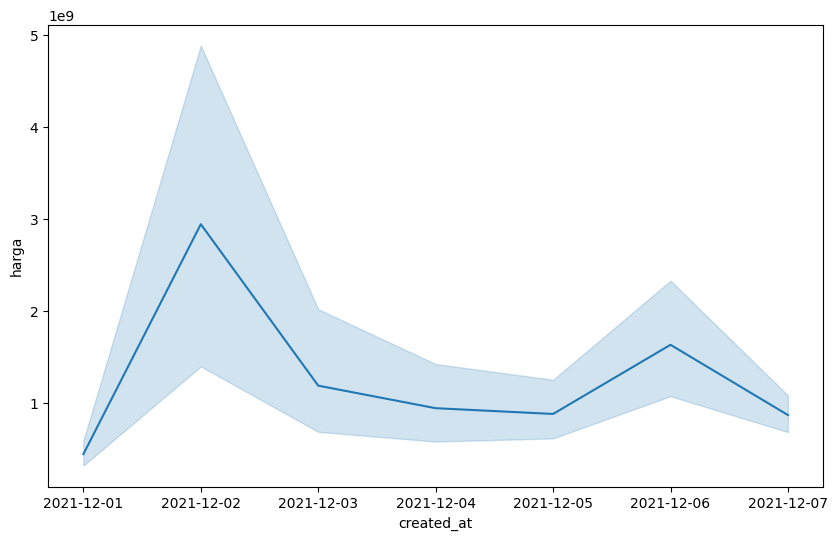

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='created_at', y='harga', data=dfB)

In [ ]:
dfB_recommended = dfB.loc[[15, 50, 140, 169]]
dfB_recommended

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
15,2021-12-06,120,90,5,3,0,3,Bogor Barat,SHM,2200,NaN,1000000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat Perumahan Taman Yasmin, Dekat Tol Nilai ...",Bogor
50,2021-12-06,200,202,5,5,2,2,Gunung Putri,SHM,4400,"Selatan, Utara",3128000000,https://www.rumah.com/listing-properti/dijual-...,"One gate system, keamanan 24 jam, fasilitas le...",Bogor
140,2021-12-04,128,68,2,1,0,1,Rumpin,Lainnya,1300,NaN,825000000,https://www.rumah.com/listing-properti/dijual-...,"Jual cepat, siap huni",Bogor
169,2021-12-05,206,100,4,2,0,1,Bogor Barat,SHM,2200,NaN,1600000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah baru di renovasi, taman luas",Bogor


#Pengolahan Data Jakarta

##Informasi Data

In [ ]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [ ]:
dfJ.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
created_at,121,19,06-12-2021,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LT,121.0,NaN,NaN,NaN,247.586777,368.384642,16.0,84.0,135.0,250.0,3422.0
LB,121.0,NaN,NaN,NaN,279.495868,285.275631,21.0,97.0,200.0,350.0,2000.0
KT,121.0,NaN,NaN,NaN,4.272727,1.901754,1.0,3.0,4.0,5.0,10.0
KM,121.0,NaN,NaN,NaN,3.380165,1.709075,1.0,2.0,3.0,4.0,10.0
garasi,44.0,NaN,NaN,NaN,1.863636,1.518734,1.0,1.0,1.0,2.0,8.0
carport,90.0,NaN,NaN,NaN,1.955556,1.47573,1.0,1.0,2.0,2.0,10.0
lokasi,121,5,Jakarta Barat,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,119,7,SHM,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,120.0,NaN,NaN,NaN,5425.0,7891.589502,900.0,2200.0,3500.0,4425.0,66000.0


##Missing Value

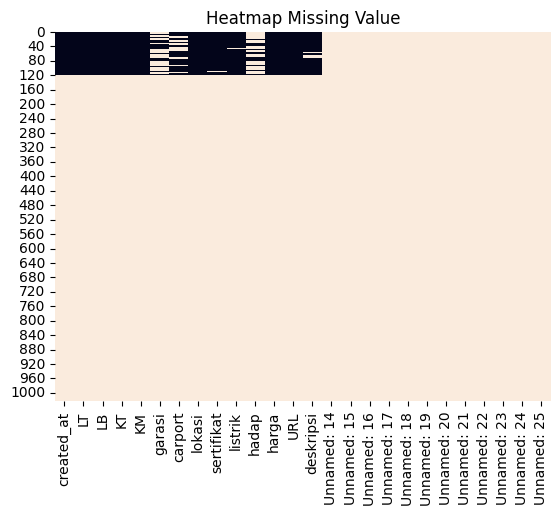

In [ ]:
# Visualisasi Missing Value
sns.heatmap(dfJ.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# Persentase Missing Value
(dfJ.isnull().sum()/len(dfJ)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,88.183594
LT,88.183594
LB,88.183594
KT,88.183594
KM,88.183594
garasi,95.703125
carport,91.210938
lokasi,88.183594
sertifikat,88.378906
listrik,88.281250


In [ ]:
dfJ.dropna(axis=1, how='all', inplace=True)

dfJ.dropna(axis=0, how='all', inplace=True)

dfJ['carport'].fillna(0, inplace=True)

dfJ['garasi'].fillna(0, inplace=True)

dfJ['sertifikat'].fillna(dfJ['sertifikat'].mode()[0], inplace=True)

dfJ['listrik'].fillna(dfJ['listrik'].median(), inplace=True)

dfJ['hadap'].fillna("tidak ada keterangan", inplace=True)

dfJ['deskripsi'].fillna("tidak ada keterangan", inplace=True)

dfJ.shape

(121, 14)

In [ ]:
# Jumlah Missing Value
dfJ.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


##Tipe Data

In [ ]:
dfJ.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [ ]:
#Mengubah tipe data menjadi datetime
dfJ['created_at'] = pd.to_datetime(dfJ['created_at'], format='%d-%m-%Y')

#Mengubah tipe data menjadi integer
dfJ['LT'] = dfJ['LT'].astype(int)
dfJ['LB'] = dfJ['LB'].astype(int)
dfJ['KT'] = dfJ['KT'].astype(int)
dfJ['KM'] = dfJ['KM'].astype(int)
dfJ['garasi'] = dfJ['garasi'].astype(int)
dfJ['carport'] = dfJ['carport'].astype(int)
dfJ['listrik'] = dfJ['listrik'].astype(int)
dfJ['harga'] = dfJ['harga'].astype(int)

#Mengubah tipe data menjadi category
dfJ['lokasi'] = dfJ['lokasi'].astype('category')
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')

In [ ]:
dfJ.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64


##Duplikasi

In [ ]:
# Mengecek data yang duplikat
dfJ[dfJ.duplicated() == True]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi


In [ ]:
# Mengecek jumlah data yang duplikat
dfJ.duplicated().sum()

0

##Noise

In [ ]:
# Mengecek noise dari variabel kategorik
dfJ["lokasi"].unique()

['Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Barat', 'Jakarta Utara ', 'Jakarta Timur']
Categories (5, object): ['Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Timur',
                         'Jakarta Utara ']

In [ ]:
dfJ["sertifikat"].unique()

['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'AJB']
Categories (7, object): ['AJB', 'PPJB', 'SHGB', 'SHM', 'SHM + Hak Pakai', 'SHM + IMB',
                         'SHM + IMB + PBB']

In [ ]:
# Melihat ringkasan statistik dari variabel kontinu
dfJ.describe()

,created_at,LT,LB,KT,KM,garasi,carport,listrik,harga
count,121,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,1.210000e+02
mean,2021-11-27 01:35:12.396694272,247.586777,279.495868,4.272727,3.380165,0.677686,1.454545,5409.090909,8.985955e+09
min,2021-02-12 00:00:00,16.000000,21.000000,1.000000,1.000000,0.000000,0.000000,900.000000,3.800000e+08
25%,2021-11-29 00:00:00,84.000000,97.000000,3.000000,2.000000,0.000000,0.000000,2200.000000,1.600000e+09
50%,2021-12-05 00:00:00,135.000000,200.000000,4.000000,3.000000,0.000000,1.000000,3500.000000,3.400000e+09
75%,2021-12-06 00:00:00,250.000000,350.000000,5.000000,4.000000,1.000000,2.000000,4400.000000,7.250000e+09
max,2021-12-26 00:00:00,3422.000000,2000.000000,10.000000,10.000000,8.000000,10.000000,66000.000000,1.050000e+11
std,NaN,368.384642,285.275631,1.901754,1.709075,1.279420,1.532971,7860.587340,1.587610e+10


In [ ]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,tidak ada keterangan,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,tidak ada keterangan,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,tidak ada keterangan,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,tidak ada keterangan,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,tidak ada keterangan,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220,239,5,4,1,2,Jakarta Timur,PPJB,3500,tidak ada keterangan,3850000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,2021-12-06,70,57,3,2,0,2,Jakarta Timur,SHM,2200,tidak ada keterangan,880000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,2021-12-06,315,280,4,3,1,2,Jakarta Timur,SHM + IMB,3500,Timur,4300000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-12-06,135,190,5,5,0,2,Jakarta Timur,SHM + IMB,2200,Selatan,3400000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


##Outlier

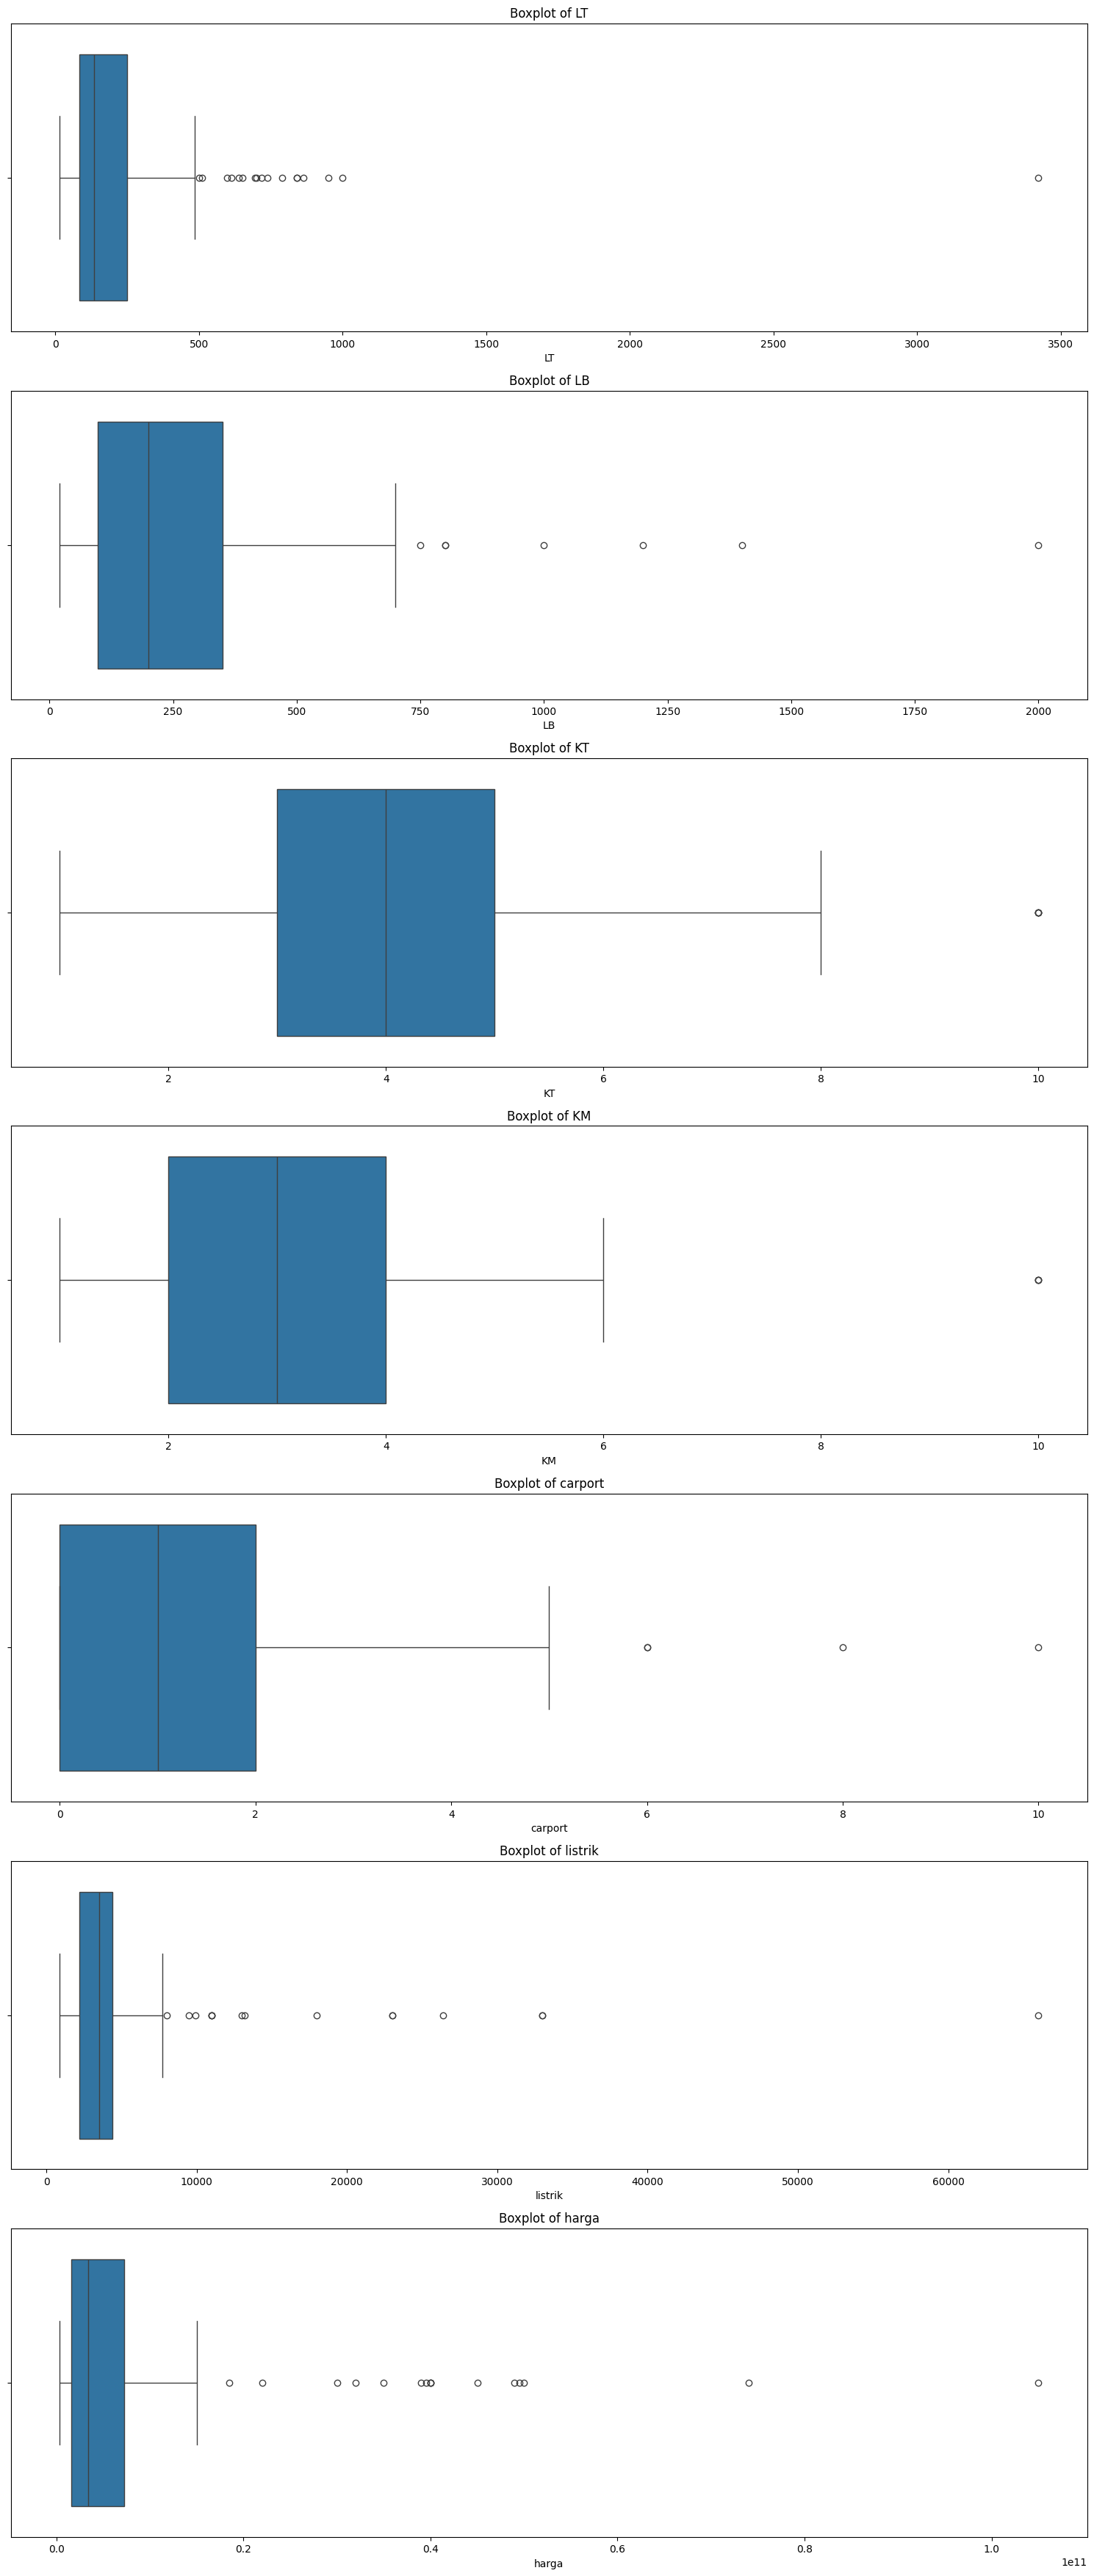

In [ ]:
numerik = dfJ[['LT', 'LB', 'KT', 'KM', 'carport', 'listrik', 'harga']]

# Mengatur ukuran plot
plt.figure(figsize=(15, len(numerik) * 5))

# Membuat boxplot untuk setiap kolom dalam daftar
for i, col in enumerate(numerik, 1):
    plt.subplot(len(numerik), 1, i)
    sns.boxplot(x=col, data=dfJ)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

<ipython-input-58-cb04299cc6bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfJ['harga'])


<Axes: xlabel='harga', ylabel='Density'>

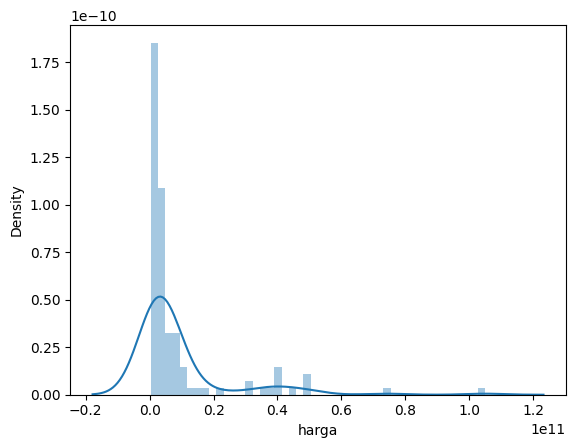

In [ ]:
sns.distplot(dfJ['harga'])

In [ ]:
Q1 = dfJ['harga'].quantile(0.25)
Q2 = dfJ['harga'].quantile(0.50)
Q3 = dfJ['harga'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_bawah = (dfJ['harga'] < (Q1 - 1.5 *IQR)) # Outlier bawah
outliers_atas = (dfJ['harga']  > (Q3 + 1.5 *IQR)) # Outlier atas
rumah_murah = dfJ.loc[outliers_bawah]
rumah_mahal = dfJ.loc[outliers_atas]

no_outlier = (dfJ['harga'] >= Q1 - 1.5 * IQR) & (dfJ['harga'] <= Q3 + 1.5 *IQR)
dfJ_no_outlier = dfJ[no_outlier]
print(dfJ.shape)
dfJ_no_outlier.reset_index(drop=True, inplace=True)
dfJ_no_outlier
dfJ_Clean = dfJ_no_outlier

Q1=1600000000.0, Q3=7250000000.0, IQR=5650000000.0
(121, 14)


In [ ]:
rumah_mahal

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
6,2021-12-06,424,1000,4,5,1,1,Jakarta Pusat,SHM,33000,Timur,49500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
7,2021-12-06,597,700,5,4,2,5,Jakarta Pusat,SHM,8000,tidak ada keterangan,40000000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
17,2021-12-05,652,405,5,4,0,4,Jakarta Pusat,SHM,6600,tidak ada keterangan,45000000000,https://www.rumah.com/listing-properti/dijual-...,Dapat dinego
18,2021-12-05,840,800,5,3,0,8,Jakarta Pusat,SHGB,6600,tidak ada keterangan,39990000000,https://www.rumah.com/listing-properti/dijual-...,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
21,2021-12-07,700,2000,10,10,0,10,Jakarta Pusat,SHM,66000,Utara,105000000000,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
34,2021-12-06,485,550,3,5,1,1,Jakarta Selatan,SHM + IMB,18000,tidak ada keterangan,22000000000,https://rumahdijual.com/tebet/10851049-rmh-mew...,- Ruang Musik\n- Kitchen set ( dapur kotor dan...
40,2021-12-06,612,485,5,4,1,2,Jakarta Selatan,SHM,13000,tidak ada keterangan,18500000000,https://rumahdijual.com/jakarta-selatan/112558...,- Lantai Bawah : Master Bed Room dengan kamar ...
41,2021-12-06,790,700,6,6,0,6,Jakarta Selatan,SHM,7700,tidak ada keterangan,32000000000,https://rumahdijual.com/jakarta-selatan/110122...,Ada kolam renang
42,2021-12-05,950,1400,6,4,7,0,Jakarta Selatan,SHM,23000,tidak ada keterangan,49000000000,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
44,2021-12-07,738,500,5,3,2,2,Jakarta Selatan,SHM + IMB,13200,tidak ada keterangan,74000000000,https://rumahdijual.com/jakarta-pusat/6519312-...,- Unfurnished dan Air Jetpump\n- Berada dalam ...


In [ ]:
rumah_mahal_sorted = rumah_mahal.sort_values(by='harga', ascending=False)
rumah_mahal_sorted

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
21,2021-12-07,700,2000,10,10,0,10,Jakarta Pusat,SHM,66000,Utara,105000000000,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
44,2021-12-07,738,500,5,3,2,2,Jakarta Selatan,SHM + IMB,13200,tidak ada keterangan,74000000000,https://rumahdijual.com/jakarta-pusat/6519312-...,- Unfurnished dan Air Jetpump\n- Berada dalam ...
46,2021-12-06,840,800,5,4,8,0,Jakarta Selatan,SHM,3500,tidak ada keterangan,50000000000,https://rumahdijual.com/jakarta-pusat/11761428...,Kawasan Rasuna Epicentrum
6,2021-12-06,424,1000,4,5,1,1,Jakarta Pusat,SHM,33000,Timur,49500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
42,2021-12-05,950,1400,6,4,7,0,Jakarta Selatan,SHM,23000,tidak ada keterangan,49000000000,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
17,2021-12-05,652,405,5,4,0,4,Jakarta Pusat,SHM,6600,tidak ada keterangan,45000000000,https://www.rumah.com/listing-properti/dijual-...,Dapat dinego
7,2021-12-06,597,700,5,4,2,5,Jakarta Pusat,SHM,8000,tidak ada keterangan,40000000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
45,2021-12-06,719,657,10,6,2,2,Jakarta Selatan,SHM,26400,tidak ada keterangan,40000000000,https://rumahdijual.com/jakarta-pusat/11761983...,- Pondasi konstruksi rangka beton bertulang\n-...
18,2021-12-05,840,800,5,3,0,8,Jakarta Pusat,SHGB,6600,tidak ada keterangan,39990000000,https://www.rumah.com/listing-properti/dijual-...,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
78,2021-12-02,260,300,3,2,0,1,Jakarta Utara,SHGB,2200,tidak ada keterangan,39500000000,https://www.rumah.com/listing-properti/dijual-...,"2 Lantai, jalanan luas, ada minimart, keamanan..."


Dari data di atas, rata-rata rumah mahal berada di Jakarta Pusat dan Jakarta Selatan dengan kisaran harga 18,5-105 miliar. kriterianya adalah sbb:
1. Luas tanah dan luas bangunan
2. Lokasi yang strategis dekat dengan pusat kota dan fasilitas umum
3. Jumlah kamar tidur dan kamar mandi

<ipython-input-62-b708e50c6811>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfJ_no_outlier['harga'])


<Axes: xlabel='harga', ylabel='Density'>

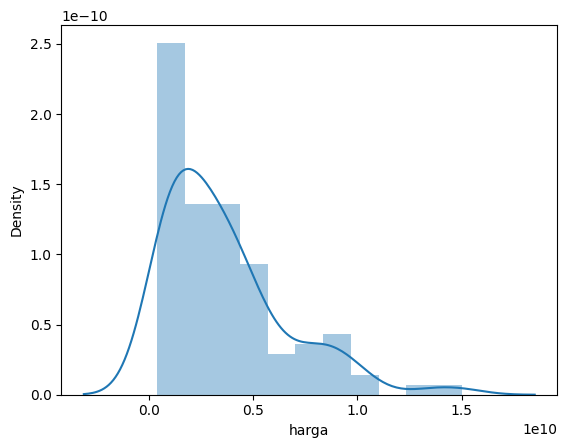

In [ ]:
sns.distplot(dfJ_no_outlier['harga'])

##Penambahan Variabel

In [ ]:
dfJ['letak_kota'] = 'Jakarta'

In [ ]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,2021-12-06,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,tidak ada keterangan,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,2021-12-02,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,tidak ada keterangan,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,tidak ada keterangan,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,2021-12-06,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,tidak ada keterangan,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,2021-12-06,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,tidak ada keterangan,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220,239,5,4,1,2,Jakarta Timur,PPJB,3500,tidak ada keterangan,3850000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...,Jakarta
117,2021-12-06,70,57,3,2,0,2,Jakarta Timur,SHM,2200,tidak ada keterangan,880000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...,Jakarta
118,2021-12-06,315,280,4,3,1,2,Jakarta Timur,SHM + IMB,3500,Timur,4300000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam...",Jakarta
119,2021-12-06,135,190,5,5,0,2,Jakarta Timur,SHM + IMB,2200,Selatan,3400000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...,Jakarta


##Save Data

In [ ]:
dfJ.to_csv('dfJ_Ori.csv', index=False)

In [ ]:
dfJ_no_outlier.to_csv('dfJ_Clean.csv', index=False)

##Visualisasi

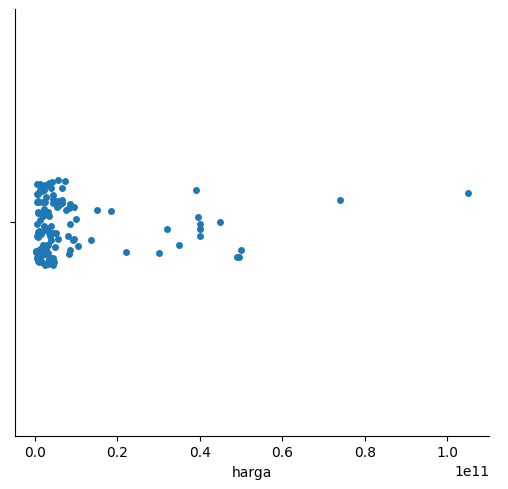

In [ ]:
sns.catplot(x = 'harga', data = dfJ)

Dari plot di atas, terlihat bahwa mayoritas rumah di Jakarta memiliki harga di kisaran 0-20 miliar.

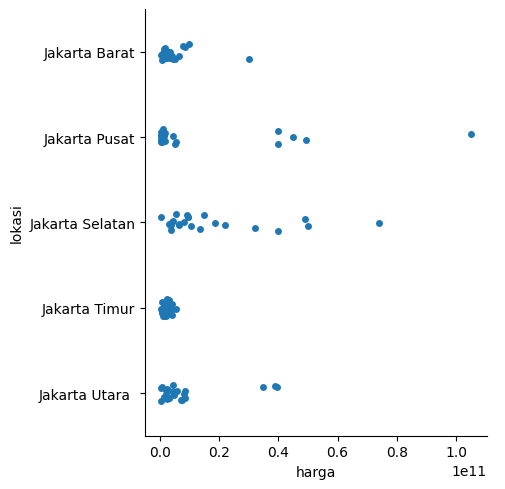

In [ ]:
sns.catplot(x="harga", y="lokasi", data=dfJ)

Pada plot di atas, terlihat bahwa rata-rata harga rumah termurah di Jakarta ada di daerah Jakarta Timur.

##Rekomendasi

In [ ]:
filtered_data = dfJ[dfJ['LT'] > dfJ['LB']]
filtered_data.shape

(35, 15)

In [ ]:
dfJ_sorted = filtered_data.sort_values(by='harga', ascending=True)
dfJ_sorted

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
83,2021-11-06,36,21,1,1,0,1,Jakarta Utara,SHM,1300,tidak ada keterangan,440000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah Murah Minimalis Jakarta Utara, Miniclust...",Jakarta
66,2021-12-07,60,31,2,1,0,1,Jakarta Barat,SHGB,1300,tidak ada keterangan,497322000,https://www.rumah.com/listing-properti/dijual-...,"""Lokasi yang strategis dekat dengan fasilitas ...",Jakarta
82,2021-11-06,90,36,1,2,0,1,Jakarta Utara,SHM,1300,tidak ada keterangan,498000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Di Jual Berkualitas Harga Terjangkau Cuk...,Jakarta
43,2021-12-05,60,48,3,2,2,0,Jakarta Selatan,SHM,2200,tidak ada keterangan,600000000,https://rumahdijual.com/jakarta-selatan/117594...,- Lokasi strategis dekat kawasan BSD dan Binta...,Jakarta
111,2021-11-25,86,45,2,1,1,1,Jakarta Timur,SHM,1300,tidak ada keterangan,690000000,https://www.rumah123.com/properti/jakarta-timu...,Rumah Cluster 1 lantai. 10 menit ke stasiun LR...,Jakarta
81,2021-12-04,60,39,1,2,0,1,Jakarta Utara,SHM,2200,tidak ada keterangan,718421053,https://www.rumah.com/listing-properti/dijual-...,"Dengan fasilitas Di Jual Rumah Dekat Dng Tol,S...",Jakarta
117,2021-12-06,70,57,3,2,0,2,Jakarta Timur,SHM,2200,tidak ada keterangan,880000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...,Jakarta
106,2021-12-06,72,69,3,2,2,2,Jakarta Timur,SHM,2200,tidak ada keterangan,890000000,https://www.rumah123.com/properti/jakarta-timu...,"Rumah Gaya Bali 2 lantai, perabotan unfurnishe...",Jakarta
14,2021-12-05,3422,64,1,1,0,1,Jakarta Pusat,SHM,2200,tidak ada keterangan,1050000000,https://www.rumah.com/listing-properti/dijual-...,Vlaster cempaka merupakan suatu kompleks perum...,Jakarta
80,2021-12-07,162,140,4,4,1,1,Jakarta Utara,PPJB,2200,Selatan,1500000000,https://rumahdijual.com/jakarta-utara/10583684...,- Rumah baru desain minimalis di cluster Norfo...,Jakarta


In [ ]:
dfJ_recommend = pd.DataFrame(columns=dfJ.columns)

dfJ_recommend.loc[0] = dfJ.loc[82]
dfJ_recommend.loc[1] = dfJ.loc[111]
dfJ_recommend.loc[2] = dfJ.loc[36]
dfJ_recommend.loc[3] = dfJ.loc[52]
dfJ_recommend.loc[4] = dfJ.loc[25]

total_harga = dfJ_recommend['harga'].sum()
total_harga

11456809000

In [ ]:
dfJ_recommend

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,2021-11-06 00:00:00,90,36,1,2,0,1,Jakarta Utara,SHM,1300,tidak ada keterangan,498000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Di Jual Berkualitas Harga Terjangkau Cuk...,Jakarta
1,2021-11-25 00:00:00,86,45,2,1,1,1,Jakarta Timur,SHM,1300,tidak ada keterangan,690000000,https://www.rumah123.com/properti/jakarta-timu...,Rumah Cluster 1 lantai. 10 menit ke stasiun LR...,Jakarta
2,2021-12-02 00:00:00,511,463,6,3,1,0,Jakarta Selatan,SHM,33000,tidak ada keterangan,4480000000,https://rumahdijual.com/tebet/11748387-jual-ru...,- Pondasi dan konstruksi beton bertulang\n- Ku...,Jakarta
3,2021-11-29 00:00:00,147,82,3,3,0,1,Jakarta Barat,SHM,2200,tidak ada keterangan,2288809000,https://www.rumah.com/listing-properti/dijual-...,Fasilitas :\n- Club House dalam Cluster\n- 5 m...,Jakarta
4,2021-12-06 00:00:00,390,200,7,2,0,1,Jakarta Selatan,SHM,1300,tidak ada keterangan,3500000000,https://rumahdijual.com/tebet/11220328-dijual-...,Bangunan lama,Jakarta


#Pengolahan Data Bekasi

## Data Bekasi


In [ ]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PREPOCESSING

In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfX.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape
dfX.drop(dfX.columns[14:26], axis=1, inplace=True)
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfX.tail(888)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,250000000.0,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,300000000.0,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,250000000.0,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfX.drop(dfX.index[107:992], axis=0, inplace=True)
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  107 non-null    object 
 1   LT          107 non-null    float64
 2   LB          107 non-null    float64
 3   KT          107 non-null    float64
 4   KM          106 non-null    float64
 5   garasi      33 non-null     float64
 6   carport     81 non-null     float64
 7   lokasi      107 non-null    object 
 8   sertifikat  106 non-null    object 
 9   listrik     101 non-null    float64
 10  hadap       48 non-null     object 
 11  harga       107 non-null    float64
 12  URL         107 non-null    object 
 13  deskripsi   107 non-null    object 
dtypes: float64(8), object(6)
memory usage: 11.8+ KB


In [ ]:
dfX['hadap'] = dfX['hadap'].astype('category')
dfX['lokasi'] = dfX['lokasi'].astype('category')
dfX['sertifikat'] = dfX['sertifikat'].astype('category')
dfX['harga'] = dfX['harga'].astype('int64')
dfX.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,category
sertifikat,category
listrik,float64


In [ ]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1600000000,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


In [ ]:
dfX.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,107,107.000000,107.000000,107.000000,106.000000,33.000000,81.000000,107,106,101.000000,48,1.070000e+02,107,107
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,4,NaN,104,106
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,Selatan,NaN,https://www.rumah123.com/properti/bekasi/hos92...,Dijual cepat Rumah cantik rapih siap huni di b...
freq,30,NaN,NaN,NaN,NaN,NaN,NaN,73,95,NaN,23,NaN,2,2
mean,NaN,108.822430,110.635514,2.962617,1.943396,1.090909,1.086420,NaN,NaN,2056.435644,NaN,1.074823e+09,NaN,NaN
std,NaN,59.164914,71.755270,1.027226,0.848867,0.291937,0.282734,NaN,NaN,969.578861,NaN,7.516152e+08,NaN,NaN
min,NaN,36.000000,30.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,1.600000e+08,NaN,NaN
25%,NaN,72.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,5.805000e+08,NaN,NaN
50%,NaN,91.000000,90.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,9.200000e+08,NaN,NaN
75%,NaN,130.500000,144.000000,4.000000,2.750000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.350000e+09,NaN,NaN


In [ ]:
# mencari data duplicate tanpa variabel deskripsi dan membuangnya
dpl = dfX[dfX.drop(columns='deskripsi').duplicated()]
dfX.drop(dpl.index, inplace=True)
print(dfX.shape)
dfX.duplicated().sum()
dfX.info()

(104, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 105
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   created_at  104 non-null    object  
 1   LT          104 non-null    float64 
 2   LB          104 non-null    float64 
 3   KT          104 non-null    float64 
 4   KM          103 non-null    float64 
 5   garasi      32 non-null     float64 
 6   carport     79 non-null     float64 
 7   lokasi      104 non-null    category
 8   sertifikat  103 non-null    category
 9   listrik     98 non-null     float64 
 10  hadap       46 non-null     category
 11  harga       104 non-null    int64   
 12  URL         104 non-null    object  
 13  deskripsi   104 non-null    object  
dtypes: category(3), float64(7), int64(1), object(3)
memory usage: 10.5+ KB


In [ ]:
# Menambah kolom letak kota
dfX['letak_kota'] = 'Bekasi'
dfX1 = dfX
print(dfX1.shape)
dfX1

(104, 15)


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d...",Bekasi
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,...",Bekasi
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman...",Bekasi
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...,Bekasi
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...,Bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-12-2021,108.0,47.0,2.0,1.0,NaN,1.0,Kota Bekasi,SHM,1300.0,NaN,1000000000,https://www.rumah123.com/properti/bekasi/hos92...,"Rumah siap,di salah satu cluster grand wisata,...",Bekasi
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1600000000,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi


In [ ]:
dfX1.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
count,104,104.000000,104.000000,104.000000,103.000000,32.000000,79.000000,104,103,98.000000,46,1.040000e+02,104,104,104
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,4,NaN,104,103,1
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,Selatan,NaN,Rumah murah di metland cibitung bekasi - Dijua...,Dijual cepat Rumah cantik rapih siap huni di b...,Bekasi
freq,29,NaN,NaN,NaN,NaN,NaN,NaN,71,92,NaN,22,NaN,1,2,104
mean,NaN,108.653846,109.278846,2.951923,1.932039,1.093750,1.088608,NaN,NaN,2061.224490,NaN,1.067847e+09,NaN,NaN,NaN
std,NaN,59.098038,71.037725,1.027579,0.843221,0.296145,0.285992,NaN,NaN,981.229258,NaN,7.477467e+08,NaN,NaN,NaN
min,NaN,36.000000,30.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,1.600000e+08,NaN,NaN,NaN
25%,NaN,72.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,5.832500e+08,NaN,NaN,NaN
50%,NaN,92.500000,90.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,9.100000e+08,NaN,NaN,NaN
75%,NaN,128.250000,143.250000,3.250000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.350000e+09,NaN,NaN,NaN


Missing value


In [ ]:
# Untuk mengetahui jumlah missing value di setiap variabel
print(dfX1.isnull().sum())

created_at     0
LT             0
LB             0
KT             0
KM             1
garasi        72
carport       25
lokasi         0
sertifikat     1
listrik        6
hadap         58
harga          0
URL            0
deskripsi      0
letak_kota     0
dtype: int64


In [ ]:
# untuk persentase
(dfX1.isnull().sum()/len(dfX)*100).to_frame('persentase missing')

,persentase missing
created_at,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.961538
garasi,69.230769
carport,24.038462
lokasi,0.000000
sertifikat,0.961538
listrik,5.769231


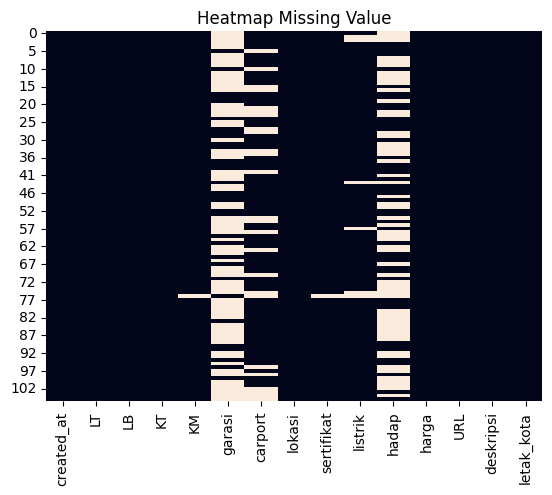

In [ ]:
# Untuk Heatmap MV
sns.heatmap(dfX1.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# Asumsi Mv pada KM, garasi, carport, listrik, sertifikat, hadap sebagai tidak punya alias 0
dfX1['KM'].fillna(0, inplace=True)
dfX1['garasi'].fillna(0, inplace=True)
dfX1['carport'].fillna(0, inplace=True)
dfX1['listrik'].fillna(0, inplace=True)

In [ ]:
# Check if '0' is already a category
if '0' not in dfX1['sertifikat'].cat.categories:
    dfX1['sertifikat'] = dfX1['sertifikat'].cat.add_categories('0')

dfX1['sertifikat'].fillna('0', inplace=True)

# Check if '0' is already a category
if '0' not in dfX1['hadap'].cat.categories:
  dfX1['hadap'] = dfX1['hadap'].cat.add_categories('0')
dfX1['hadap'].fillna('0', inplace=True)

dfX1

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,08-12-2021,71.0,43.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,1300.0,0,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d...",Bekasi
1,08-12-2021,59.0,60.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,0.0,0,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,...",Bekasi
2,08-12-2021,124.0,95.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,0.0,0,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman...",Bekasi
3,08-12-2021,144.0,100.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...,Bekasi
4,08-12-2021,108.0,100.0,3.0,2.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...,Bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-12-2021,108.0,47.0,2.0,1.0,0.0,1.0,Kota Bekasi,SHM,1300.0,0,1000000000,https://www.rumah123.com/properti/bekasi/hos92...,"Rumah siap,di salah satu cluster grand wisata,...",Bekasi
102,01-12-2021,180.0,220.0,5.0,3.0,0.0,0.0,Kota Bekasi,SHM,2200.0,0,1600000000,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
103,01-12-2021,140.0,250.0,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,Selatan,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
104,01-12-2021,60.0,55.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,0,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi


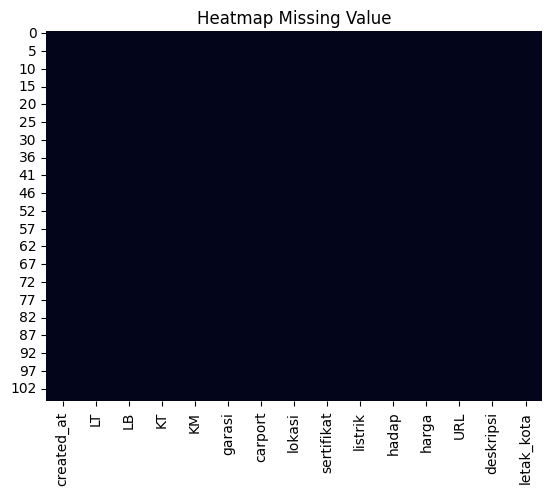

In [ ]:
# Untuk Heatmap setelah MV ditangani
sns.heatmap(dfX1.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# untuk persentase
(dfX1.isnull().sum()/len(dfX)*100).to_frame('persentase missing')

,persentase missing
created_at,0.0
LT,0.0
LB,0.0
KT,0.0
KM,0.0
garasi,0.0
carport,0.0
lokasi,0.0
sertifikat,0.0
listrik,0.0


Outlier


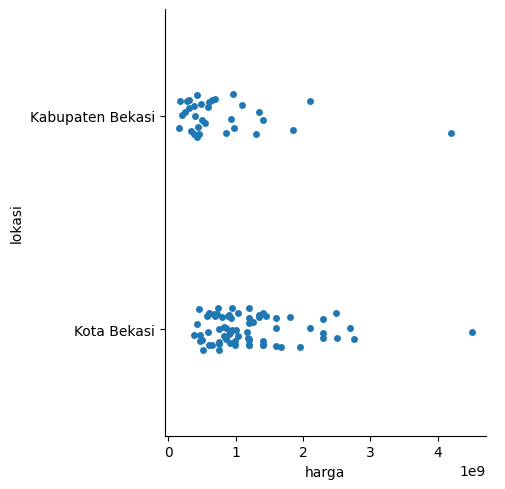

In [ ]:
p = sns.catplot(x="harga", y="lokasi", data=dfX1)

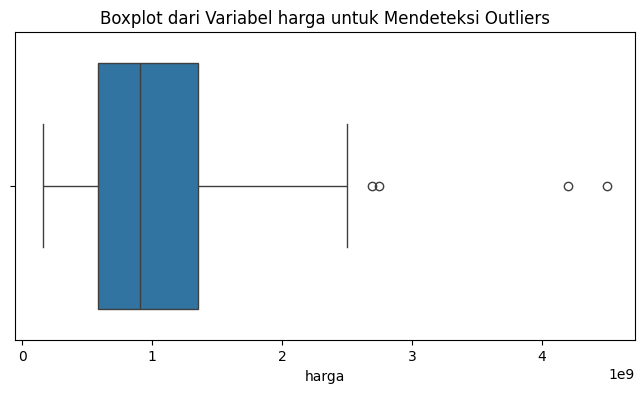

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfX1["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

In [ ]:
dfX1['lokasi'] = dfX1['lokasi'].astype('category')
dfX1['LT'] = dfX1['LT'].astype('int')
dfX1['LB'] = dfX1['LB'].astype('int')
dfX1['KM'] = dfX1['KM'].astype('int')
dfX1['KT'] = dfX1['KT'].astype('int')
dfX1['garasi'] = dfX1['garasi'].astype('int')
dfX1['carport'] = dfX1['carport'].astype('int')
dfX1['listrik'] = dfX1['listrik'].astype('int')
dfX1['harga'] = dfX1['harga'].astype('int')

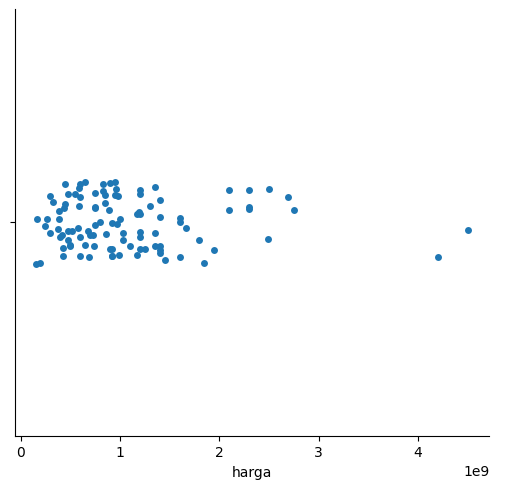

In [ ]:
p = sns.catplot(x = 'harga', data = dfX1)

In [ ]:
Q1 = dfX1["harga"].quantile(0.25)
Q2 = dfX1["harga"].quantile(0.50)
Q3 = dfX1["harga"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (dfX1["harga"] >= Q1 - 1.5 * IQR) & (dfX1["harga"] <= Q3 + 1.5 *IQR)

# Dataframe without outlier
dfX_no_out = dfX1[no_outlier]
# Dataframe with outlier
dfX_out = dfX1[~no_outlier]
dfX_no_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,08-12-2021,71,43,2,1,0,1,Kabupaten Bekasi,SHM,1300,0,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d...",Bekasi
1,08-12-2021,59,60,2,1,0,1,Kabupaten Bekasi,SHM,0,0,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,...",Bekasi
2,08-12-2021,124,95,2,1,0,1,Kabupaten Bekasi,SHM,0,0,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman...",Bekasi
3,08-12-2021,144,100,2,1,0,1,Kabupaten Bekasi,SHM,2200,Selatan,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...,Bekasi
4,08-12-2021,108,100,3,2,0,1,Kabupaten Bekasi,SHM,2200,Timur,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...,Bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-12-2021,108,47,2,1,0,1,Kota Bekasi,SHM,1300,0,1000000000,https://www.rumah123.com/properti/bekasi/hos92...,"Rumah siap,di salah satu cluster grand wisata,...",Bekasi
102,01-12-2021,180,220,5,3,0,0,Kota Bekasi,SHM,2200,0,1600000000,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
103,01-12-2021,140,250,3,2,0,0,Kabupaten Bekasi,SHM,2200,Selatan,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
104,01-12-2021,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300,0,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi


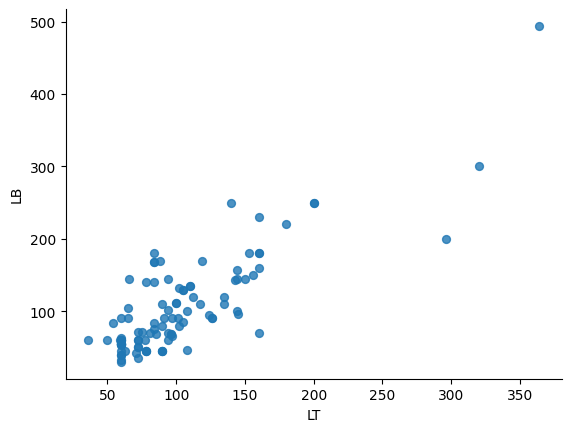

In [ ]:
from matplotlib import pyplot as plt
dfX_no_out.plot(kind='scatter', x='LT', y='LB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

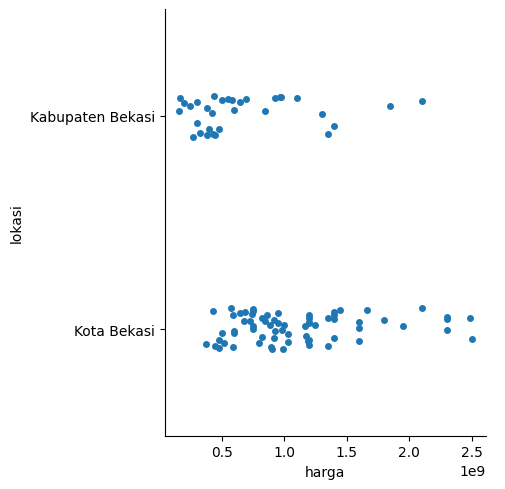

In [ ]:
p = sns.catplot(x="harga", y="lokasi", data=dfX_no_out)

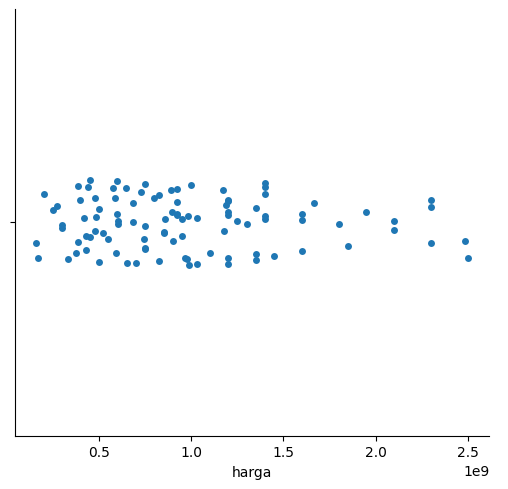

In [ ]:
p = sns.catplot(x = 'harga', data = dfX_no_out)

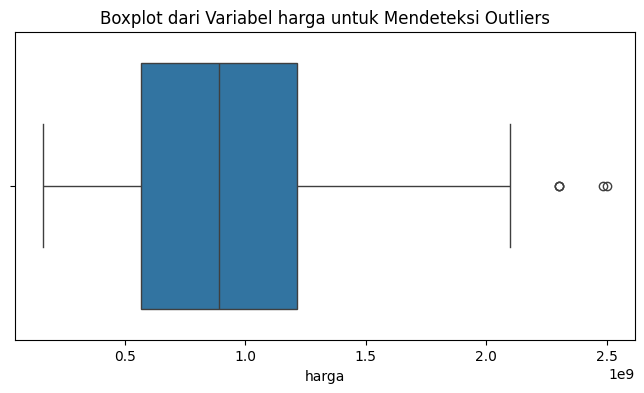

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfX_no_out["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

Data-data Outlier


In [ ]:
dfX_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
7,07-12-2021,336,200,4,3,0,1,Kabupaten Bekasi,HGB,5500,0,4200000000,https://www.99.co/id/properti/rumah-cluster-pa...,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ...",Bekasi
15,06-12-2021,245,117,3,2,0,0,Kota Bekasi,SHM,2200,Timur,2750000000,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek...",Bekasi
31,06-12-2021,200,293,6,4,1,1,Kota Bekasi,SHM,5500,0,4500000000,https://www.99.co/id/properti/rumah-mewah-harg...,"Jual cepat rumah mewah harga murah , 3 Lantai,...",Bekasi
100,01-12-2021,144,180,4,3,0,2,Kota Bekasi,SHM,4400,0,2690000000,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...,Bekasi


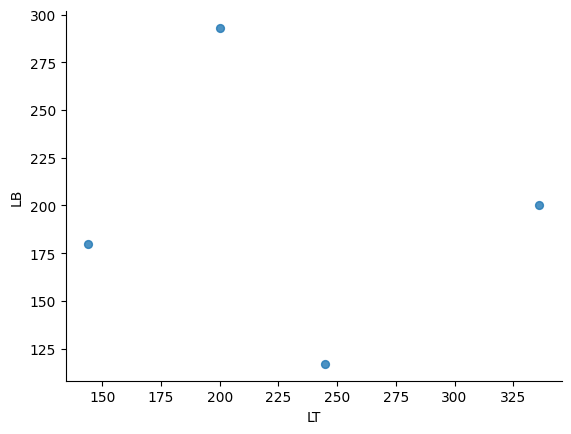

In [ ]:
from matplotlib import pyplot as plt
dfX_out.plot(kind='scatter', x='LT', y='LB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Statiskia Deskriptif

In [ ]:
dfX_no_out.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
created_at,100,8,06-12-2021,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LT,100.0,NaN,NaN,NaN,103.75,52.939908,36.0,71.75,90.0,120.25,364.0
LB,100.0,NaN,NaN,NaN,105.75,69.010667,30.0,60.0,90.0,140.25,494.0
KT,100.0,NaN,NaN,NaN,2.9,0.989847,1.0,2.0,3.0,3.0,7.0
KM,100.0,NaN,NaN,NaN,1.87,0.83672,0.0,1.0,2.0,2.0,4.0
garasi,100.0,NaN,NaN,NaN,0.34,0.535978,0.0,0.0,0.0,1.0,2.0
carport,100.0,NaN,NaN,NaN,0.82,0.519907,0.0,1.0,1.0,1.0,2.0
lokasi,100,2,Kota Bekasi,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,100,4,SHM,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,100.0,NaN,NaN,NaN,1844.0,926.742966,0.0,1300.0,2200.0,2200.0,5500.0


In [ ]:
dfX_no_out.describe(include = "all")

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
count,100,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100,100,100.000000,100,1.000000e+02,100,100,100
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,5,NaN,100,99,1
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,0,NaN,Rumah murah di metland cibitung bekasi - Dijua...,Dijual cepat Rumah cantik rapih siap huni di b...,Bekasi
freq,27,NaN,NaN,NaN,NaN,NaN,NaN,68,89,NaN,55,NaN,1,2,100
mean,NaN,103.750000,105.750000,2.900000,1.87000,0.340000,0.820000,NaN,NaN,1844.000000,NaN,9.691610e+08,NaN,NaN,NaN
std,NaN,52.939908,69.010667,0.989847,0.83672,0.535978,0.519907,NaN,NaN,926.742966,NaN,5.464756e+08,NaN,NaN,NaN
min,NaN,36.000000,30.000000,1.000000,0.00000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.600000e+08,NaN,NaN,NaN
25%,NaN,71.750000,60.000000,2.000000,1.00000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,5.687500e+08,NaN,NaN,NaN
50%,NaN,90.000000,90.000000,3.000000,2.00000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,8.925000e+08,NaN,NaN,NaN
75%,NaN,120.250000,140.250000,3.000000,2.00000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.212500e+09,NaN,NaN,NaN


In [ ]:
dfX_Clean = dfX_no_out

## VISUALISASI

In [ ]:
dfX.sort_values(by=['harga'], ascending=False).tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
19,06-12-2021,60,40,2,1,1,1,Kabupaten Bekasi,SHM,1300,0,385000000,https://www.rumah123.com/properti/bekasi/hos92...,Dijual rumah daerah dekat grand Wisata bekasi ...,Bekasi
24,06-12-2021,60,40,2,1,1,1,Kota Bekasi,SHM,1300,Timur,375000000,https://www.rumah123.com/properti/bekasi/hos92...,"Dekat jalan raya, Dekat fasilitas umum seperti...",Bekasi
40,05-12-2021,72,36,2,1,0,0,Kabupaten Bekasi,SHM,2200,Timur,330000000,RUMAH FRESH MANIS SIAP HUNI di Taman Wanasari ...,"Akses Dekat :* Sekolahan, * Rumah Sakit, * Tem...",Bekasi
84,03-12-2021,90,45,3,2,0,1,Kabupaten Bekasi,SHM,1300,0,300000000,https://www.rumah123.com/properti/bekasi/hos92...,Di lelang Tidak Bergerak Tanah berikut banguna...,Bekasi
105,01-12-2021,36,60,2,1,0,0,Kabupaten Bekasi,SHM,1300,Timur,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ...",Bekasi
80,03-12-2021,90,45,2,1,0,1,Kabupaten Bekasi,SHM,1300,0,270000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di lelang Tidak Bergerak, Tanah berikut bangun...",Bekasi
104,01-12-2021,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300,0,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi
47,05-12-2021,72,72,2,1,1,1,Kabupaten Bekasi,SHM,1300,0,200000000,https://www.rumah123.com/properti/bekasi/hos92...,"Rumah BEBAS BANJIR harga 200 jt nego , luas ta...",Bekasi
86,03-12-2021,60,30,2,1,0,1,Kabupaten Bekasi,HGB,1300,0,168000000,https://www.rumah123.com/properti/bekasi/hos92...,"DISKON DP ALL IN Hingga 6,1 Juta !!! Segera Ik...",Bekasi
27,06-12-2021,60,55,2,1,1,0,Kabupaten Bekasi,SHM,900,Timur,160000000,https://rumahdijual.com/8986218,"Lokasi sangat strategis, jarak 10 menit'an dar...",Bekasi


In [ ]:
dfX.sort_values(by=['created_at'], ascending=False).tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
96,01-12-2021,50,60,3,2,1,0,Kota Bekasi,"SHM,IMB",2200,0,647000000,https://www.99.co/id/properti/hunian-cantik-de...,RUMAH MURAH DESIGN MEWAH DI TIMUR JAKARTA 5 ME...,Bekasi
97,01-12-2021,65,105,3,2,0,1,Kota Bekasi,SHM,2200,0,1190000000,https://www.realoka.com/221877-alif-premiere-r...,Rumah Exclusive 3 lantai. Lokasi Sangat Strate...,Bekasi
98,01-12-2021,156,150,7,2,0,0,Kota Bekasi,HGB,2200,Timur,1200000000,https://www.rumah123.com/properti/bekasi/hos92...,Dijual Rumah Taman Wisma Asri 2 Teluk Pucung B...,Bekasi
99,01-12-2021,320,300,3,3,1,2,Kota Bekasi,SHM,2200,0,2500000000,https://www.rumah123.com/properti/bekasi/hos92...,Luas tanah 320m; Luas bangunan 300m; 2 Lantai;...,Bekasi
100,01-12-2021,144,180,4,3,0,2,Kota Bekasi,SHM,4400,0,2690000000,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...,Bekasi
101,01-12-2021,108,47,2,1,0,1,Kota Bekasi,SHM,1300,0,1000000000,https://www.rumah123.com/properti/bekasi/hos92...,"Rumah siap,di salah satu cluster grand wisata,...",Bekasi
102,01-12-2021,180,220,5,3,0,0,Kota Bekasi,SHM,2200,0,1600000000,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
103,01-12-2021,140,250,3,2,0,0,Kabupaten Bekasi,SHM,2200,Selatan,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
104,01-12-2021,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300,0,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi
105,01-12-2021,36,60,2,1,0,0,Kabupaten Bekasi,SHM,1300,Timur,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ...",Bekasi


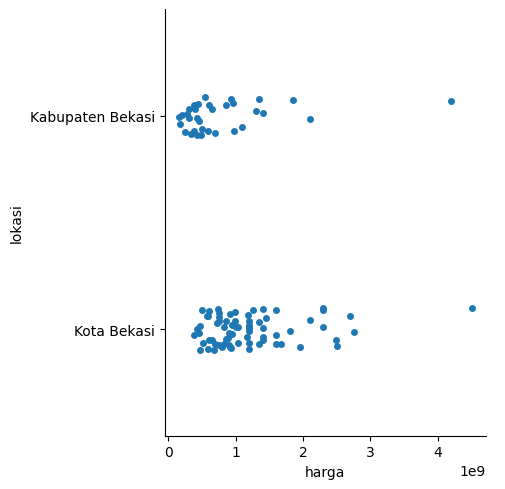

In [ ]:
sns.catplot(x="harga", y="lokasi", data=dfX1)

In [ ]:
harga_max = 5_000_000_000  # 750 juta
harga_min = 200_000_000  # 200 juta
properti_murah = dfX_no_out[(dfX_no_out['harga'] >= harga_min) & (dfX_no_out['harga'] <= harga_max)]
rmh_murah = properti_murah[(properti_murah['KT'] >= 2)]
rmh_murah = rmh_murah.sort_values(by=['harga'], ascending=False)
rmh_murah

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
99,01-12-2021,320,300,3,3,1,2,Kota Bekasi,SHM,2200,0,2500000000,https://www.rumah123.com/properti/bekasi/hos92...,Luas tanah 320m; Luas bangunan 300m; 2 Lantai;...,Bekasi
76,03-12-2021,364,494,5,0,1,0,Kota Bekasi,0,0,0,2485000000,https://www.iklanrumah.com/list/detail/37392/r...,Rumah Mewah Pondok Pekayon Indah Siap Huni di ...,Bekasi
17,06-12-2021,200,250,4,3,1,1,Kota Bekasi,SHM,2200,Selatan,2300000000,https://www.rumah123.com/properti/bekasi/hos92...,rumah mewah dalam cluster eksklusif di harapan...,Bekasi
16,06-12-2021,296,200,4,2,0,0,Kota Bekasi,SHM,5500,0,2300000000,https://www.rumah123.com/properti/bekasi/hos84...,"Rumah Hoek dalam cluster Aralia, Rumah hadap t...",Bekasi
95,02-12-2021,200,250,4,3,0,1,Kota Bekasi,SHM,2200,Selatan,2300000000,https://www.rumah123.com/properti/bekasi/hos92...,Dijual cepat harga BU rumah mewah dalam cluste...,Bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,03-12-2021,90,45,3,2,0,1,Kabupaten Bekasi,SHM,1300,0,300000000,https://www.rumah123.com/properti/bekasi/hos92...,Di lelang Tidak Bergerak Tanah berikut banguna...,Bekasi
105,01-12-2021,36,60,2,1,0,0,Kabupaten Bekasi,SHM,1300,Timur,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ...",Bekasi
80,03-12-2021,90,45,2,1,0,1,Kabupaten Bekasi,SHM,1300,0,270000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di lelang Tidak Bergerak, Tanah berikut bangun...",Bekasi
104,01-12-2021,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300,0,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi


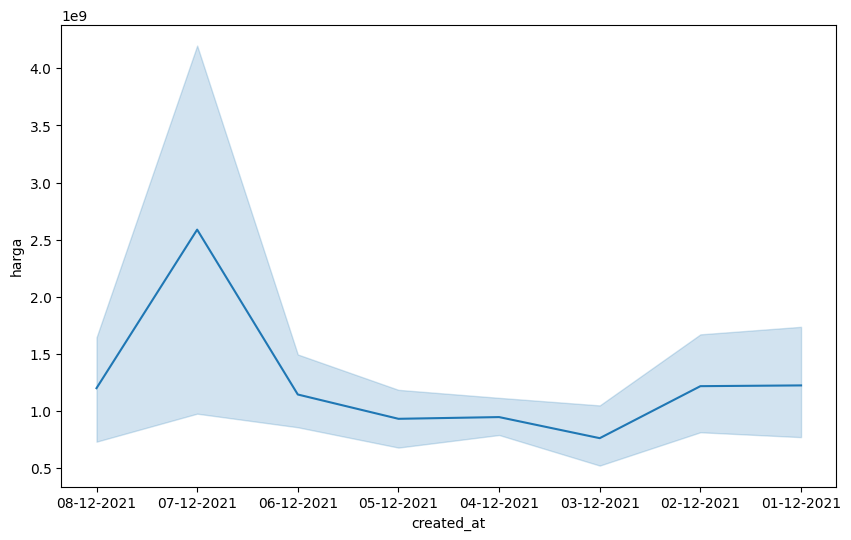

In [ ]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(x="created_at", y="harga", data=dfX1)

<ipython-input-112-c4e5e1bff8f3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfX1, x='KT', y='harga', palette='Dark2')


<Axes: xlabel='KT', ylabel='harga'>

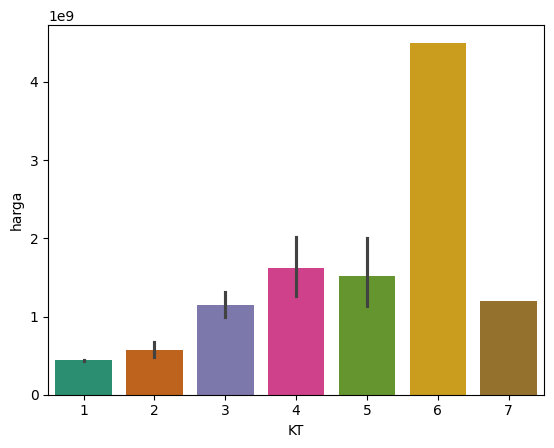

In [ ]:
sns.barplot(data=dfX1, x='KT', y='harga', palette='Dark2')

<ipython-input-113-2572e920accb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfX1, x='KM', y='harga', palette='Dark2')


<Axes: xlabel='KM', ylabel='harga'>

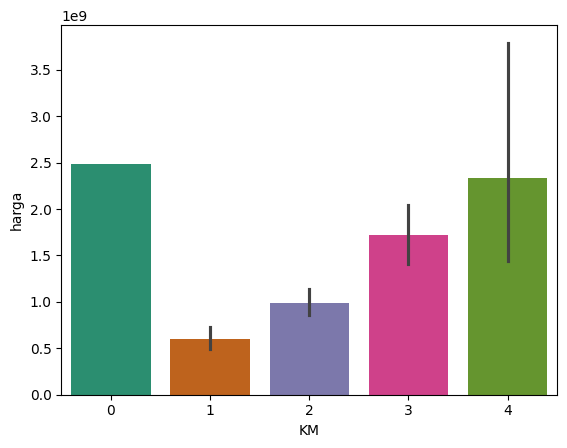

In [ ]:
sns.barplot(data=dfX1, x='KM', y='harga', palette='Dark2')

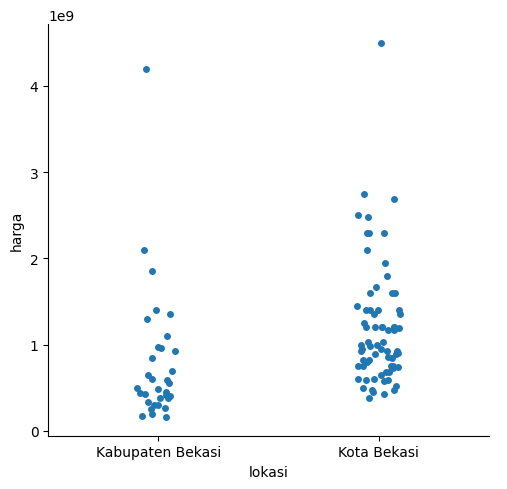

In [ ]:
p2 = sns.catplot(x="lokasi", y="harga", data=dfX1)

In [ ]:
dfX1.reset_index(inplace = True)

In [ ]:
total_sisa = 0
banyak_sisa = 0
for i in range(dfX1.shape[0]):
    cek = dfX1['LT'][i] - dfX1['LB'][i]
    if cek > 0:
        total_sisa += cek
        banyak_sisa += 1
        print(f'baris ke: {i} - sisa: {cek}')
print(f'\nterdapat {banyak_sisa} rumah dengan dengan sisa tanah > 0 \ndengan rata2 sisa tanah {(total_sisa)/banyak_sisa}')

baris ke: 0 - sisa: 28
baris ke: 2 - sisa: 29
baris ke: 3 - sisa: 44
baris ke: 4 - sisa: 8
baris ke: 7 - sisa: 136
baris ke: 10 - sisa: 17
baris ke: 11 - sisa: 22
baris ke: 14 - sisa: 17
baris ke: 15 - sisa: 128
baris ke: 16 - sisa: 96
baris ke: 18 - sisa: 5
baris ke: 19 - sisa: 20
baris ke: 21 - sisa: 9
baris ke: 24 - sisa: 20
baris ke: 25 - sisa: 7
baris ke: 27 - sisa: 5
baris ke: 28 - sisa: 33
baris ke: 29 - sisa: 1
baris ke: 38 - sisa: 10
baris ke: 39 - sisa: 36
baris ke: 41 - sisa: 18
baris ke: 42 - sisa: 22
baris ke: 48 - sisa: 31
baris ke: 49 - sisa: 7
baris ke: 50 - sisa: 11
baris ke: 52 - sisa: 15
baris ke: 53 - sisa: 24
baris ke: 56 - sisa: 16
baris ke: 57 - sisa: 5
baris ke: 60 - sisa: 20
baris ke: 62 - sisa: 5
baris ke: 63 - sisa: 28
baris ke: 64 - sisa: 5
baris ke: 65 - sisa: 36
baris ke: 66 - sisa: 22
baris ke: 69 - sisa: 90
baris ke: 70 - sisa: 36
baris ke: 71 - sisa: 12
baris ke: 72 - sisa: 27
baris ke: 73 - sisa: 49
baris ke: 76 - sisa: 12
baris ke: 77 - sisa: 27
baris

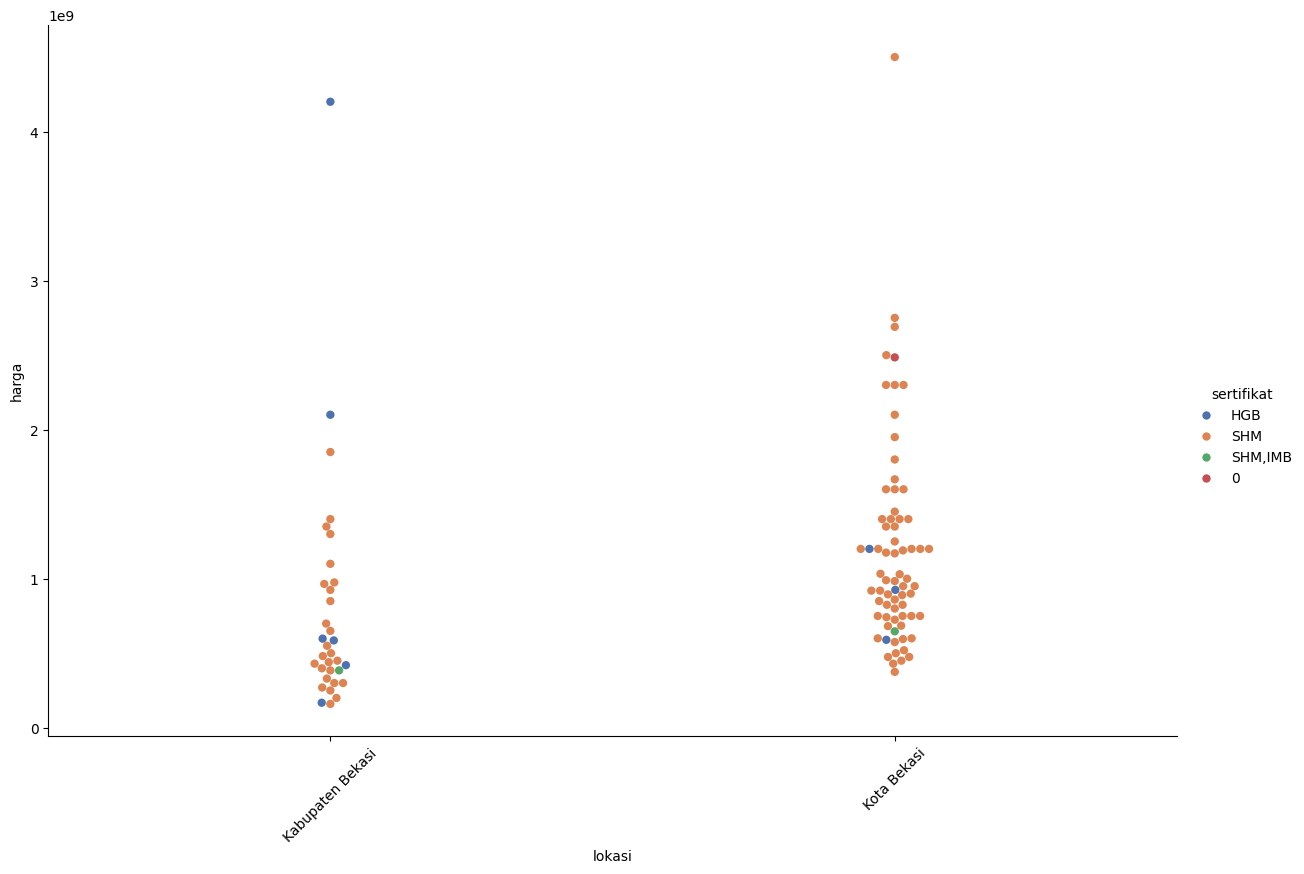

In [ ]:
pp = sns.catplot(x="lokasi", y="harga", hue="sertifikat", kind="swarm", data = dfX1, height=8, aspect=1.5, size=6, palette="deep")
plt.xticks(rotation=45)
plt.show()

## Recommendation

In [ ]:
dfX2 = dfX1.iloc[[0, 3, 16, 20, 39, 69, 73]] # Use iloc to select rows by their numerical index.
dfX_Recom = dfX2.sort_values(by=['harga'], ascending=False)
dfX_Recom

,index,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
16,16,06-12-2021,296,200,4,2,0,0,Kota Bekasi,SHM,5500,0,2300000000,https://www.rumah123.com/properti/bekasi/hos84...,"Rumah Hoek dalam cluster Aralia, Rumah hadap t...",Bekasi
3,3,08-12-2021,144,100,2,1,0,1,Kabupaten Bekasi,SHM,2200,Selatan,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...,Bekasi
73,75,03-12-2021,145,96,4,2,0,0,Kabupaten Bekasi,SHM,0,0,965000000,https://www.olx.co.id/item/dijual-rumah-murah-...,Dijual Rumah Murah di Perumahan Kirana Cibitun...,Bekasi
69,71,04-12-2021,160,70,3,1,1,1,Kabupaten Bekasi,SHM,900,Selatan,925000000,https://www.rumah123.com/properti/bekasi/hos92...,"Dalam komplek yg nyaman, jalan 2 mbl, butuh re...",Bekasi
20,20,06-12-2021,94,145,4,2,0,1,Kota Bekasi,SHM,2200,Selatan,825000000,https://www.rumah123.com/properti/bekasi/hos92...,Dijual rumah 2 lantai siap huni luas 94m2 type...,Bekasi
0,0,08-12-2021,71,43,2,1,0,1,Kabupaten Bekasi,SHM,1300,0,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d...",Bekasi
39,40,05-12-2021,72,36,2,1,0,0,Kabupaten Bekasi,SHM,2200,Timur,330000000,RUMAH FRESH MANIS SIAP HUNI di Taman Wanasari ...,"Akses Dekat :* Sekolahan, * Rumah Sakit, * Tem...",Bekasi


<Axes: xlabel='LT', ylabel='harga'>

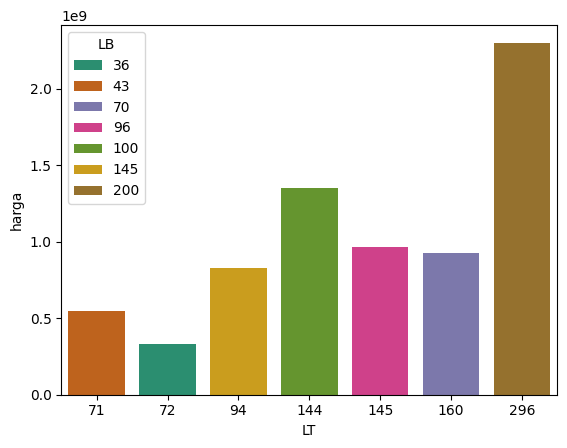

In [ ]:
sns.barplot(data=dfX_Recom, x='LT', y='harga', hue='LB', palette='Dark2')

<Axes: xlabel='listrik', ylabel='harga'>

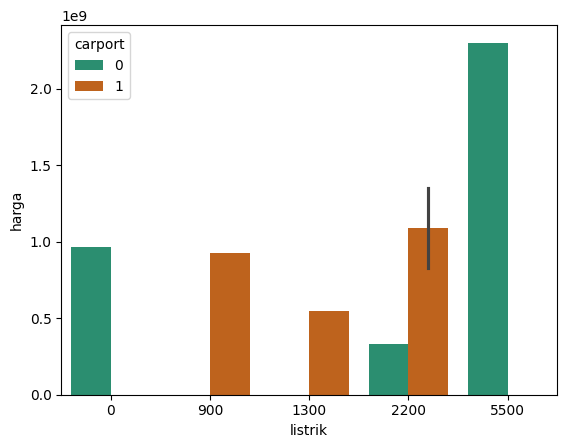

In [ ]:
sns.barplot(data=dfX_Recom, x='listrik', y='harga', hue='carport', palette='Dark2')

In [ ]:
dfX1.describe(include = 'all')

,index,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
count,104.000000,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104,104,104.000000,104,1.040000e+02,104,104,104
unique,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,5,NaN,104,103,1
top,NaN,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,0,NaN,Rumah murah di metland cibitung bekasi - Dijua...,Dijual cepat Rumah cantik rapih siap huni di b...,Bekasi
freq,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,71,92,NaN,58,NaN,1,2,104
mean,52.730769,NaN,108.653846,109.278846,2.951923,1.913462,0.336538,0.826923,NaN,NaN,1942.307692,NaN,1.067847e+09,NaN,NaN,NaN
std,30.977045,NaN,59.098038,71.037725,1.027579,0.860239,0.532635,0.529559,NaN,NaN,1067.679846,NaN,7.477467e+08,NaN,NaN,NaN
min,0.000000,NaN,36.000000,30.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.600000e+08,NaN,NaN,NaN
25%,25.750000,NaN,72.000000,60.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,5.832500e+08,NaN,NaN,NaN
50%,53.500000,NaN,92.500000,90.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,9.100000e+08,NaN,NaN,NaN
75%,79.250000,NaN,128.250000,143.250000,3.250000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.350000e+09,NaN,NaN,NaN


#Pengolahan Data Tangerang

###Data Tangerang

In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfT.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:



dfT.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


### Menghapus Kolom yang tidak digunakan

In [ ]:
dfT.drop("hadap", axis=1, inplace=True)
dfT.drop("Unnamed: 14", axis=1, inplace=True)
dfT.drop("Unnamed: 15", axis=1, inplace=True)
dfT.drop("Unnamed: 16", axis=1, inplace=True)
dfT.drop("Unnamed: 17", axis=1, inplace=True)
dfT.drop("Unnamed: 18", axis=1, inplace=True)
dfT.drop("Unnamed: 19", axis=1, inplace=True)
dfT.drop("Unnamed: 20", axis=1, inplace=True)
dfT.drop("Unnamed: 21", axis=1, inplace=True)
dfT.drop("Unnamed: 22", axis=1, inplace=True)
dfT.drop("Unnamed: 23", axis=1, inplace=True)
dfT.drop("Unnamed: 24", axis=1, inplace=True)
dfT.drop("Unnamed: 25", axis=1, inplace=True)
dfT.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."


###Menangani duplikat data

In [ ]:
print(dfT.shape)
dfT.duplicated().sum()

(128, 13)


3

In [ ]:
dfT.drop_duplicates(inplace=True)
print(dfT.duplicated().sum())
print(dfT.shape)

0
(125, 13)


In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:
dfT.drop(dfT.index[124], axis = 0, inplace = True)

In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


### Menangani Missing Value

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

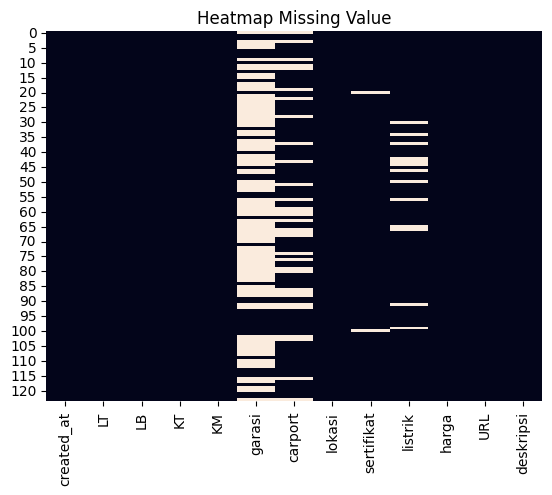

In [ ]:
sns.heatmap(dfT.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
dfT.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,86
carport,32
lokasi,0
sertifikat,2
listrik,13


In [ ]:
dfT.fillna(0, inplace=True)

In [ ]:
dfT.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
dfT.shape

(124, 13)

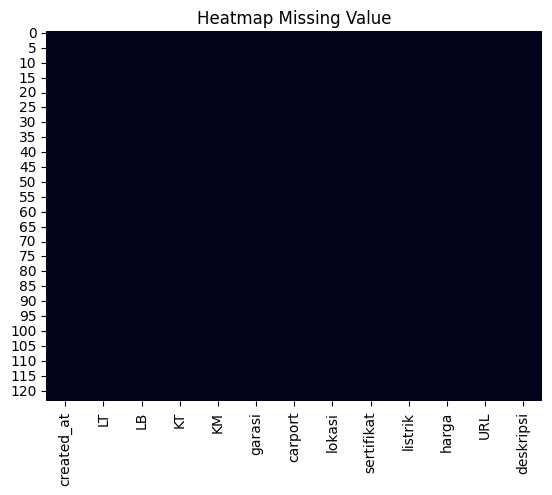

In [ ]:
sns.heatmap(dfT.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

### Menangani Outlier

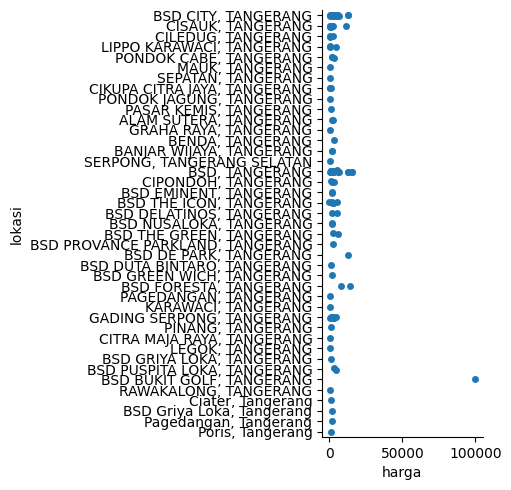

In [ ]:
p = sns.catplot(x="harga", y="lokasi", data=dfT)

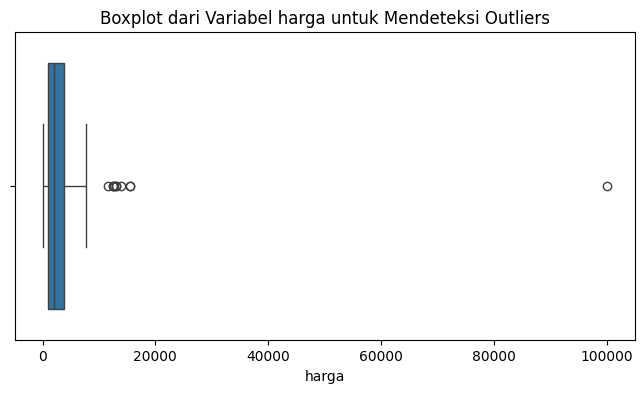

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfT["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

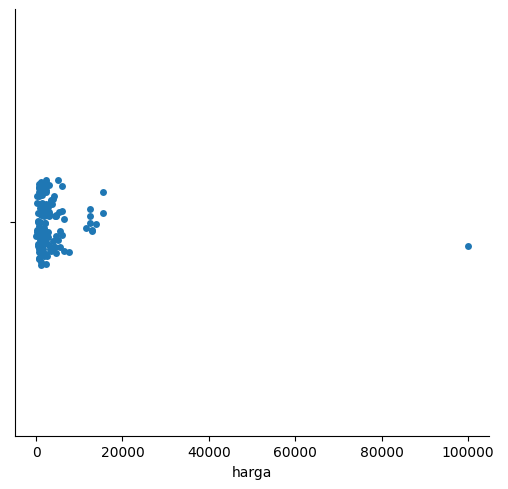

In [ ]:
p = sns.catplot(x = 'harga', data = dfT)

In [ ]:
dfT['lokasi'] = dfT['lokasi'].astype('category')
dfT['LT'] = dfT['LT'].astype('int')
dfT['LB'] = dfT['LB'].astype('int')
dfT['KM'] = dfT['KM'].astype('int')
dfT['KT'] = dfT['KT'].astype('int')
dfT['garasi'] = dfT['garasi'].astype('int')
dfT['carport'] = dfT['carport'].astype('int')
dfT['listrik'] = dfT['listrik'].astype('int')
dfT['harga'] = dfT['harga'].astype('int')
dfT['harga'] = dfT['harga']*1000000
dfT['sertifikat'] = dfT['sertifikat'].astype('category')
dfT['deskripsi'] = dfT['deskripsi'].astype('category')
dfT['URL'] = dfT['URL'].astype('category')
dfT['created_at'] = dfT['created_at'].astype('category')

In [ ]:
Q1 = dfT["harga"].quantile(0.25)
Q2 = dfT["harga"].quantile(0.50)
Q3 = dfT["harga"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (dfT["harga"] >= Q1 - 1.5 * IQR) & (dfT["harga"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
dfT_no_out = dfT[no_outlier]

# Creating DataFrame With Outliers
dfT_out = dfT[~no_outlier]

In [ ]:
dfT_no_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,12-06-2021,60,50,3,2,0,0,"BSD CITY, TANGERANG",SHM,1300,500000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72,54,2,1,1,1,"CISAUK, TANGERANG",SHM,1300,480000000,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60,48,3,2,2,2,"CILEDUG, TANGERANG",SHM,2200,600000000,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200,225,5,4,0,0,"LIPPO KARAWACI, TANGERANG",SHM,5500,4250000000,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76,123,3,3,0,2,"PONDOK CABE, TANGERANG",SHM,2200,1700000000,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60,55,2,2,0,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200,711000000,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66,70,3,2,0,1,"Ciater, Tangerang",SHM,1300,850000000,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202,85,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200,1860000000,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108,130,3,3,1,1,"Pagedangan, Tangerang",SHM,2200,1800000000,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


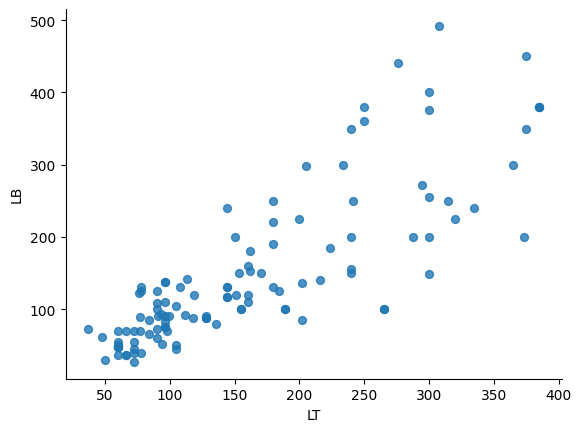

In [ ]:
from matplotlib import pyplot as plt
dfT_no_out.plot(kind='scatter', x='LT', y='LB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

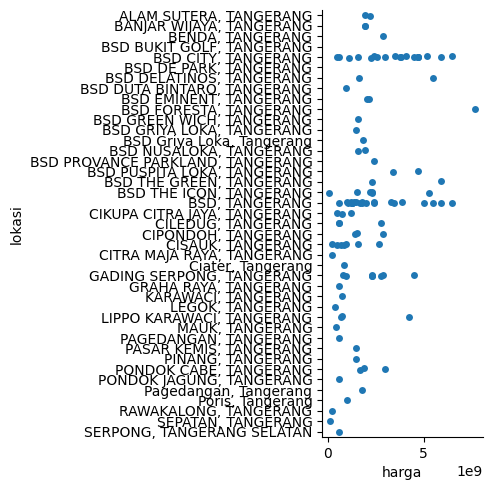

In [ ]:
p = sns.catplot(x="harga", y="lokasi", data=dfT_no_out)

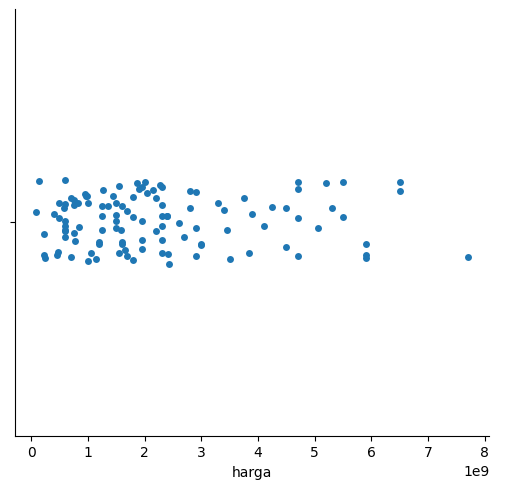

In [ ]:
 p = sns.catplot(x = 'harga', data = dfT_no_out)

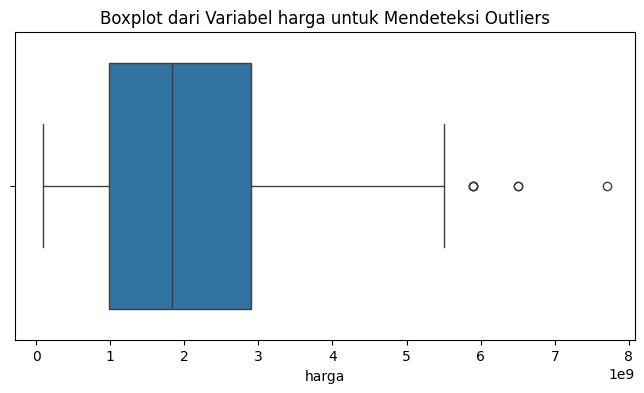

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dfT_no_out["harga"], orient="h")
plt.title('Boxplot dari Variabel harga untuk Mendeteksi Outliers')
plt.show()

In [ ]:
dfT_Clean = dfT_no_out

#### data data outlier

In [ ]:
dfT_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
20,12-06-2021,276,441,4,4,2,2,"BSD CITY, TANGERANG",0,11000,13000000000,https://www.rumah123.com/properti/tangerang/ho...,Miliki Hunian Eksklusif dengan akses langsung ...
32,12-06-2021,534,1000,5,6,6,2,"BSD, TANGERANG",SHM,16500,15500000000,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt..."
47,12-06-2021,625,500,5,3,0,2,"BSD, TANGERANG",SHM,5500,12500000000,https://www.rumah123.com/properti/tangerang/ho...,"Di Jual Rumah di Bsd, Aman dan Nyaman, Komplek..."
49,12-06-2021,534,1000,8,8,6,6,"BSD, TANGERANG",SHM,16500,15500000000,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...
54,12-06-2021,474,500,6,5,4,2,"BSD DE PARK, TANGERANG",SHM,23000,12500000000,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
66,12-06-2021,276,441,4,4,0,0,"BSD FORESTA, TANGERANG",SHM,0,14000000000,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...
67,12-06-2021,276,441,5,5,0,0,"BSD CITY, TANGERANG",HGB,3500,12600000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah Dijual Tangerang , Hot, rumah sultan ter..."
76,12-06-2021,230,370,4,4,0,0,"CISAUK, TANGERANG",HGB,3500,11600000000,https://www.rumah123.com/properti/tangerang/ho...,LOKASI LAUREL SANGAT STRATEGIS SELANGKAH KE BO...
100,12-06-2021,3087,2500,5,5,10,10,"BSD BUKIT GOLF, TANGERANG",0,66000,100000000000,https://www.rumah123.com/properti/tangerang/ho...,Rumah Super Mewah Bukit Golf BSD City rumah me...
114,12-08-2021,276,441,4,4,4,4,"BSD, TANGERANG",SHM,11000,13000000000,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...


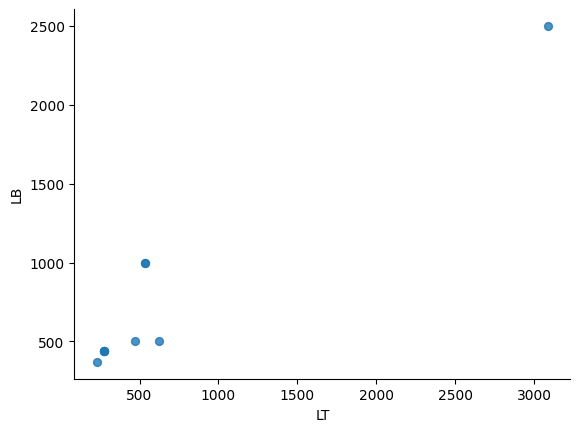

In [ ]:
from matplotlib import pyplot as plt
dfT_out.plot(kind='scatter', x='LT', y='LB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###Statistika Deskriptif

In [ ]:
dfT_no_out.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
created_at,114,3,12-06-2021,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LT,114.0,NaN,NaN,NaN,162.640351,94.55196,37.0,90.0,144.0,231.5,385.0
LB,114.0,NaN,NaN,NaN,150.026316,106.557597,27.0,75.0,118.0,200.0,492.0
KT,114.0,NaN,NaN,NaN,3.201754,0.961008,2.0,3.0,3.0,4.0,6.0
KM,114.0,NaN,NaN,NaN,2.508772,1.115027,1.0,2.0,2.0,3.0,6.0
garasi,114.0,NaN,NaN,NaN,0.45614,0.853316,0.0,0.0,0.0,1.0,4.0
carport,114.0,NaN,NaN,NaN,1.052632,0.839744,0.0,0.25,1.0,1.75,4.0
lokasi,114,39,"BSD, TANGERANG",23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,114,3,SHM,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,114.0,NaN,NaN,NaN,2485.087719,1723.509101,0.0,2200.0,2200.0,2200.0,11000.0


In [ ]:
total_sisa = 0
banyak_sisa = 0
for i in range(dfT.shape[0]):
    cek = dfT['LB'][i] - dfT['LT'][i]
    if cek > 0:
        total_sisa += cek
        banyak_sisa += 1
        print(f'baris ke: {i} - sisa: {cek}')
print(f'\nterdapat {banyak_sisa} rumah dengan dengan sisa tanah > 0 \ndengan rata2 sisa tanah {(total_sisa)/banyak_sisa}')

baris ke: 3 - sisa: 25
baris ke: 4 - sisa: 47
baris ke: 6 - sisa: 35
baris ke: 12 - sisa: 52
baris ke: 16 - sisa: 110
baris ke: 20 - sisa: 165
baris ke: 23 - sisa: 18
baris ke: 27 - sisa: 18
baris ke: 28 - sisa: 35
baris ke: 30 - sisa: 1
baris ke: 32 - sisa: 466
baris ke: 35 - sisa: 93
baris ke: 37 - sisa: 42
baris ke: 39 - sisa: 42
baris ke: 49 - sisa: 466
baris ke: 51 - sisa: 10
baris ke: 52 - sisa: 14
baris ke: 53 - sisa: 10
baris ke: 54 - sisa: 26
baris ke: 55 - sisa: 130
baris ke: 57 - sisa: 40
baris ke: 58 - sisa: 47
baris ke: 63 - sisa: 9
baris ke: 64 - sisa: 66
baris ke: 66 - sisa: 165
baris ke: 67 - sisa: 165
baris ke: 68 - sisa: 50
baris ke: 73 - sisa: 14
baris ke: 76 - sisa: 140
baris ke: 85 - sisa: 10
baris ke: 88 - sisa: 12
baris ke: 89 - sisa: 100
baris ke: 90 - sisa: 70
baris ke: 91 - sisa: 110
baris ke: 92 - sisa: 29
baris ke: 96 - sisa: 75
baris ke: 101 - sisa: 184
baris ke: 105 - sisa: 75
baris ke: 109 - sisa: 165
baris ke: 114 - sisa: 165
baris ke: 117 - sisa: 96
bar

In [ ]:
def format_rupiah(x):
    return f"Rp{x:,.0f}".replace(',', '.')

# Mengubah kolom 'harga' menjadi format Rupiah
dfT['harga_rupiah'] = dfT['harga'].apply(format_rupiah)

In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,harga_rupiah
0,12-06-2021,60,50,3,2,0,0,"BSD CITY, TANGERANG",SHM,1300,500000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",Rp500.000.000
1,12-06-2021,72,54,2,1,1,1,"CISAUK, TANGERANG",SHM,1300,480000000,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",Rp480.000.000
2,12-06-2021,60,48,3,2,2,2,"CILEDUG, TANGERANG",SHM,2200,600000000,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",Rp600.000.000
3,12-06-2021,200,225,5,4,0,0,"LIPPO KARAWACI, TANGERANG",SHM,5500,4250000000,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",Rp4.250.000.000
4,12-06-2021,76,123,3,3,0,2,"PONDOK CABE, TANGERANG",SHM,2200,1700000000,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",Rp1.700.000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60,55,2,2,0,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200,711000000,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Rp711.000.000
120,12-08-2021,66,70,3,2,0,1,"Ciater, Tangerang",SHM,1300,850000000,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Rp850.000.000
121,12-08-2021,202,85,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200,1860000000,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Rp1.860.000.000
122,12-08-2021,108,130,3,3,1,1,"Pagedangan, Tangerang",SHM,2200,1800000000,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Rp1.800.000.000


###Save Data

In [ ]:
# Langkah 1: Simpan DataFrame ke file CSV
import pandas as pd
from google.colab import files

# Misalkan df adalah DataFrame hasil preprocessing
#dfT.to_csv('data_tangerang_preprocessing_dengan_outlier.csv', index=False)
#dfT_no_out.to_csv('data_tangerang_preprocessing_tanpa_outlier.csv', index=False)
# Langkah 2: Download file ke komputer

#files.download('data_tangerang_preprocessing_dengan_outlier.csv')
#files.download('data_tangerang_preprocessing_tanpa_outlier.csv')

# Pengolahan Data Depok



## Informasi Data



### Data yang digunakan

In [ ]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Info Data

In [ ]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

### Statistika deskriptif

In [ ]:
dfD.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,119,120,118.000000,118.000000,118.000000,25.000000,94.000000,118,118,103.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,4,58,NaN,NaN,NaN,NaN,NaN,11,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5-12-2021,50,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,74,12,NaN,NaN,NaN,NaN,NaN,30,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,92.618644,2.737288,1.940678,1.760000,1.670213,NaN,NaN,2147.572816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,92.630404,1.024720,0.980950,1.392839,1.061428,NaN,NaN,1166.261386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,15.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,46.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,61.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,102.250000,3.000000,2.000000,2.000000,2.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [ ]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Menghapus variabel

In [ ]:
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# kolom variabel unnammed14 s.d. unnamed25 dihapus karena berdasarkan dfd.info() terlihat bahwa tidak ada baris yang NaN
dfD.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace = True)

### Noise

cek noise

In [ ]:
dfD['created_at'].unique()

array(['6-12-2021', '5-12-2021', '4-12-2021', nan, 'NOTE:'], dtype=object)

In [ ]:
dfD.loc[dfD['created_at']=='NOTE:']

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfD['LT'].unique()

array(['165', '50', '72', '40', '45', '36', '87', '210', '60', '70',
       '200', '57', '100', '97', '112', '84', '75', '487', '378', '400',
       '77', '1024', '120', '151', '885', '54', '249', '76', '66', '79',
       '78', '105', '63', '62', '71', '92', '96', '65', '104', '110',
       '64', '51', '85', '81', '59', '88', '47', '55', '82', '185', '880',
       '74', '335', '83', '94', '80', nan,
       '- lokasi yang kami gunakan hanya per kecamatan',
       '-harga yang kami gunakan adalah per satuan juta'], dtype=object)

In [ ]:
dfD['sertifikat'].unique()

array(['SHM', 'Lainnya', nan], dtype=object)

In [ ]:
dfD.loc[dfD['LT']=='-harga yang kami gunakan adalah per satuan juta']

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
121,NaN,-harga yang kami gunakan adalah per satuan juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#menghapus index ke 120 dan 121 karena terdapat noise
dfD.drop(dfD.iloc[120:121].index, inplace=True)

### Missing Value

cek baris
karena pada statistika deskriptif terliat baris-baris terakhir berisi semua kolomnya kosong

In [ ]:
dfD.tail(882)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dari output diatas terlihat bahwa dari baris index ke 118 s.d. 997 semua kosong (kecuali pada variabel created_at dan LT di index ke 120 dan 121  merupakan noise penulisan dan sudah dihapus )
# untuk memastikan akan dilakukan pengecekan dengan menggukan info() dan cek duplikasi

dfD.iloc[118:998].info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 118 to 997
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  0 non-null      object 
 1   LT          1 non-null      object 
 2   LB          0 non-null      float64
 3   KT          0 non-null      float64
 4   KM          0 non-null      float64
 5   garasi      0 non-null      float64
 6   carport     0 non-null      float64
 7   lokasi      0 non-null      object 
 8   sertifikat  0 non-null      object 
 9   listrik     0 non-null      float64
 10  hadap       0 non-null      object 
 11  harga       0 non-null      float64
 12  URL         0 non-null      object 
 13  deskripsi   0 non-null      object 
dtypes: float64(7), object(7)
memory usage: 103.0+ KB


In [ ]:
#dilakukan penghapusan untuk baris index ke 118 s.d. 997
dfD.drop(dfD.iloc[118:998].index, inplace=True)

In [ ]:
#cek data setelah dilakukan penghapusan
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,NaN,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,NaN,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...


<Axes: >

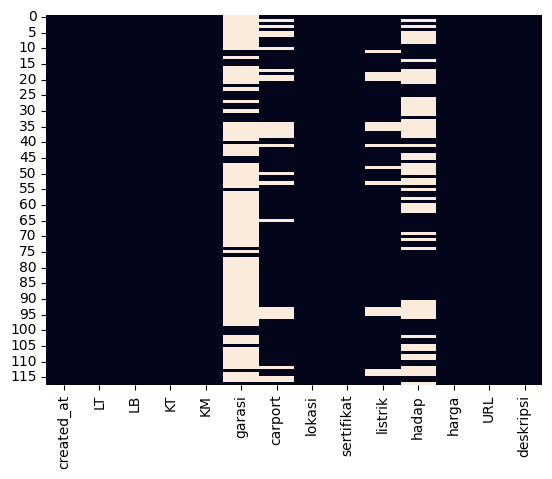

In [ ]:
sns.heatmap(dfD.isnull(), cbar=False)

In [ ]:
#cek missing value
dfD.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,93
carport,24
lokasi,0
sertifikat,0
listrik,15


In [ ]:
#Mengisi missing value dengan 0, median dan modus
dfD['garasi'] = dfD['garasi'].fillna(0)
dfD['carport']= dfD['carport'].fillna(0)
dfD['listrik'].fillna(dfD['listrik'].median(), inplace = True)
dfD['hadap'].fillna(dfD['hadap'].mode()[0], inplace = True)

<Axes: >

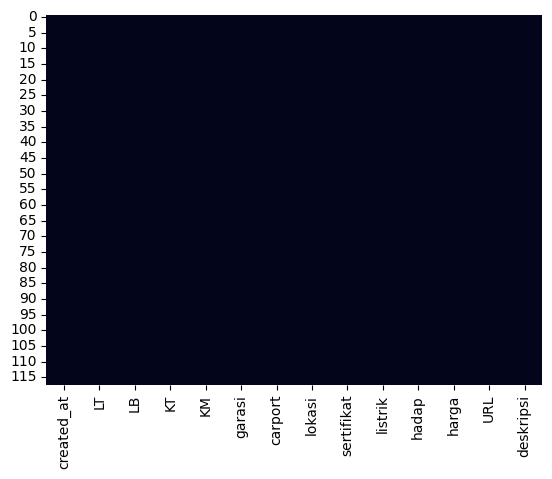

In [ ]:
sns.heatmap(dfD.isnull(), cbar=False)

In [ ]:
dfD.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


### Menambahkan variabel (letak kota)

In [ ]:
#penambahan variabel letak_kota
dfD['letak_kota'] = 'depok'
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,6-12-2021,165,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,depok
1,6-12-2021,50,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,Utara,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,depok
2,6-12-2021,50,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,depok
3,6-12-2021,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,Utara,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,depok
4,6-12-2021,72,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,2200.0,Utara,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur,depok
114,4-12-2021,72,45.0,2.0,1.0,0.0,1.0,Cimanggis,SHM,2200.0,Utara,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK,depok
115,4-12-2021,40,40.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...,depok
116,4-12-2021,50,50.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...,depok


### Tipe data

In [ ]:
#Cek tipe data
dfD.dtypes

,0
created_at,object
LT,object
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [ ]:
# Ubah tipe variabel pada data yangkurang sesuai
dfD["created_at"]= pd.to_datetime(dfD['created_at'], dayfirst=True)
dfD["LT"] = pd.to_numeric(dfD['LT'], errors='coerce').astype('Int64')
dfD['LT'] = pd.to_numeric(dfD['LT'], errors='coerce').astype('Int64')
dfD['LB'] = pd.to_numeric(dfD['LB'], errors='coerce').astype('Int64')
dfD[['KT','KM']]=dfD[['KT','KM']].astype("int64")
dfD['garasi'] = pd.to_numeric(dfD['garasi'], errors='coerce').astype('Int64')
dfD['listrik'] = pd.to_numeric(dfD['listrik'], errors='coerce').astype('Int64')
dfD['carport'] = pd.to_numeric(dfD['carport'], errors='coerce').astype('Int64')
dfD['harga']= pd.to_numeric(dfD['harga'], errors='coerce').astype('Int64')
dfD[['lokasi', 'sertifikat', 'hadap','letak_kota']]=dfD[['lokasi', 'sertifikat', 'hadap','letak_kota']].astype('category')
dfD.dtypes

,0
created_at,datetime64[ns]
LT,Int64
LB,Int64
KT,int64
KM,int64
garasi,Int64
carport,Int64
lokasi,category
sertifikat,category
listrik,Int64


ubah format variabel harga menjadi jutaan agar sama seperti data lain

In [ ]:
dfD['harga']=dfD['harga']*1000000
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,2021-12-06,165,200,4,2,0,1,Sukmajaya,SHM,2200,Selatan,2100000000,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,depok
1,2021-12-06,50,45,2,1,0,0,Cipayung,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,depok
2,2021-12-06,50,36,2,1,0,1,Sawangan,SHM,1300,Barat,250000000,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,depok
3,2021-12-06,50,45,2,1,0,0,Cimanggis,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,depok
4,2021-12-06,72,45,2,1,0,1,Sawangan,SHM,1300,Timur,350000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2021-12-04,79,115,2,1,1,1,Sukmajaya,SHM,2200,Utara,750000000,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur,depok
114,2021-12-04,72,45,2,1,0,1,Cimanggis,SHM,2200,Utara,1000000000,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK,depok
115,2021-12-04,40,40,2,1,0,0,Cipayung,SHM,1300,Timur,195000000,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...,depok
116,2021-12-04,50,50,2,1,0,0,Cipayung,SHM,1300,Selatan,185000000,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...,depok


### Outlier

<ipython-input-182-4dd1011f3a79>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p= sns.distplot(dfD['harga'])


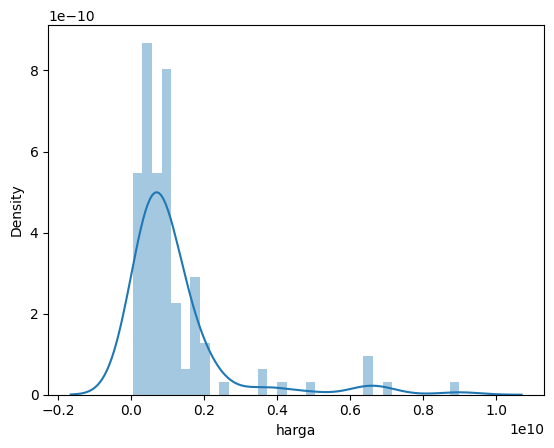

In [ ]:
p= sns.distplot(dfD['harga'])

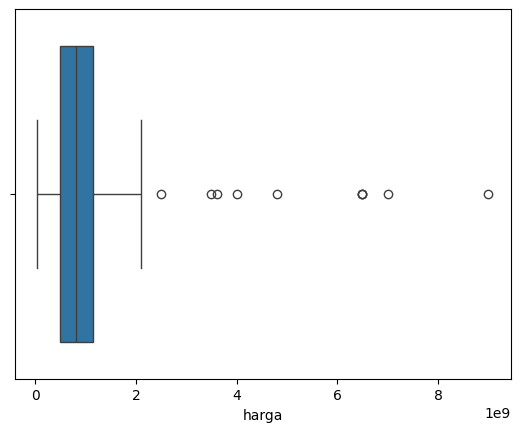

In [ ]:
p= sns.boxplot(x='harga', data=dfD)

In [ ]:
Q1 = dfD['harga'].quantile(0.25)
Q2 = dfD['harga'].quantile(0.50)
Q3 = dfD['harga'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_bawah = (dfD['harga'] < (Q1 - 1.5 *IQR)) # Outlier bawah
outliers_atas = (dfD['harga']  > (Q3 + 1.5 *IQR)) # Outlier atas
rumah_murah_depok = dfD.loc[outliers_bawah]
rumah_mahal_depok = dfD.loc[outliers_atas]

no_outlier = (dfD['harga'] >= Q1 - 1.5 * IQR) & (dfD['harga'] <= Q3 + 1.5 *IQR)
dfD_Clean= dfD[no_outlier]
print(dfD.shape)
dfD_Clean.reset_index(drop=True, inplace=True)
dfD_Clean

Q1=485000000.0, Q3=1137500000.0, IQR=652500000.0
(118, 15)


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
0,2021-12-06,165,200,4,2,0,1,Sukmajaya,SHM,2200,Selatan,2100000000,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,depok
1,2021-12-06,50,45,2,1,0,0,Cipayung,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,depok
2,2021-12-06,50,36,2,1,0,1,Sawangan,SHM,1300,Barat,250000000,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,depok
3,2021-12-06,50,45,2,1,0,0,Cimanggis,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,depok
4,2021-12-06,72,45,2,1,0,1,Sawangan,SHM,1300,Timur,350000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-12-04,79,115,2,1,1,1,Sukmajaya,SHM,2200,Utara,750000000,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur,depok
104,2021-12-04,72,45,2,1,0,1,Cimanggis,SHM,2200,Utara,1000000000,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK,depok
105,2021-12-04,40,40,2,1,0,0,Cipayung,SHM,1300,Timur,195000000,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...,depok
106,2021-12-04,50,50,2,1,0,0,Cipayung,SHM,1300,Selatan,185000000,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...,depok


<ipython-input-185-10c57f76e969>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p= sns.distplot(dfD_Clean['harga'])


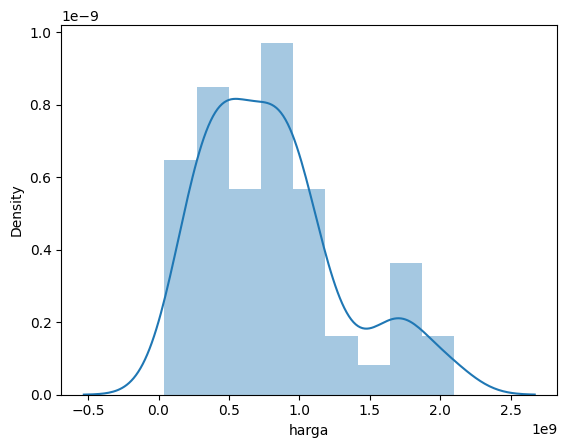

In [ ]:
p= sns.distplot(dfD_Clean['harga'])

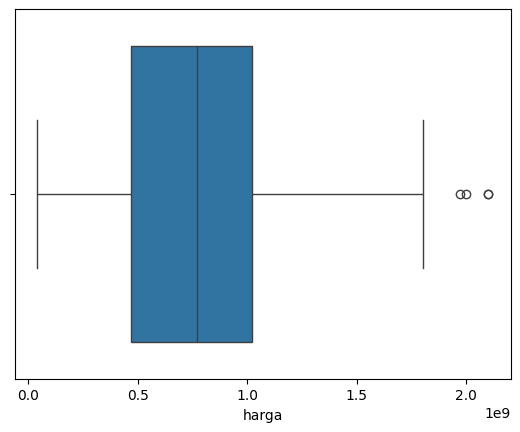

In [ ]:
p= sns.boxplot(x='harga', data= dfD_Clean)

In [ ]:
#outlier
rumah_mahal_depok

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota
23,2021-12-05,487,450,6,3,0,5,Pancoran Mas,SHM,2200,Utara,4000000000,https://www.rumah123.com/properti/depok/hos928...,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...,depok
24,2021-12-05,378,289,4,4,3,3,Sukmajaya,SHM,5500,Timur Laut,7000000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...,depok
25,2021-12-05,400,226,5,4,2,1,Cinere,SHM,2200,Selatan,3600000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...,depok
28,2021-12-05,1024,400,7,5,6,6,Limo,SHM,4400,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah plus paviliun dengan taman luas selangka...,depok
29,2021-12-05,1024,400,7,5,6,6,Cinere,SHM,5500,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...,depok
32,2021-12-05,151,180,3,3,1,1,Pancoran Mas,SHM,2200,Selatan,3500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok,depok
33,2021-12-05,885,600,7,4,2,2,Cimanggis,SHM,6600,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman...",depok
38,2021-12-05,249,260,3,2,0,0,Bojong Sari,Lainnya,2200,Utara,2500000000,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok,depok
103,2021-12-04,880,400,5,1,0,7,Cinere,SHM,3300,Selatan,9000000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Halaman Luas Pondok Labu Cocok Untuk Min...,depok
105,2021-12-04,335,300,4,3,2,2,Cinere,SHM,10000,Utara,4800000000,https://www.rumah123.com/properti/depok/hos928...,Rumah megah komplek elite cinere segera survey...,depok


### Save Data

In [ ]:
dfD.to_csv('dfD_Ori.csv', index=False)

In [ ]:
dfD_Clean.to_csv('dfD_Clean.csv', index=False)

## Visualisasi

Melihat korelasi antar variabel harga dengan variabel numerik lainnya pada data, untuk melihat pengaruh tiap variabel terhadap harga rumah di kota Depok.

<Axes: >

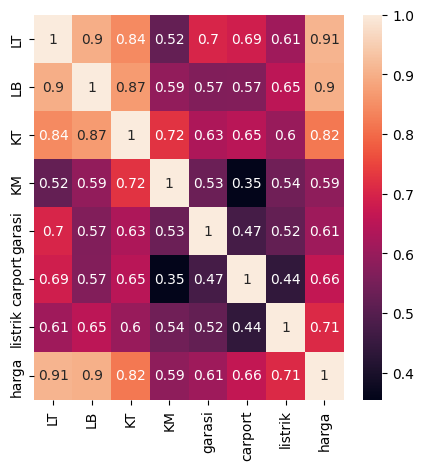

In [ ]:
num_var= dfD.select_dtypes(include=['int64','float64'])
corr_matrix =num_var.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, ax=ax)

Berdasarkan heatmap nilai korelasi antar variabel numerik data kota Depok, terlihat bahwa semua variabel menunjukan hubungan positif yang kuat terhadap harga rumah. Hal tersebut menunjukan bahwa harga rumah di kota Depok dipengaruhi oleh luas tanah, luas bangunan, jumlah kamar tidur, jumlah kamar mandi, kapasitas garasi, dan kapasitas carport.

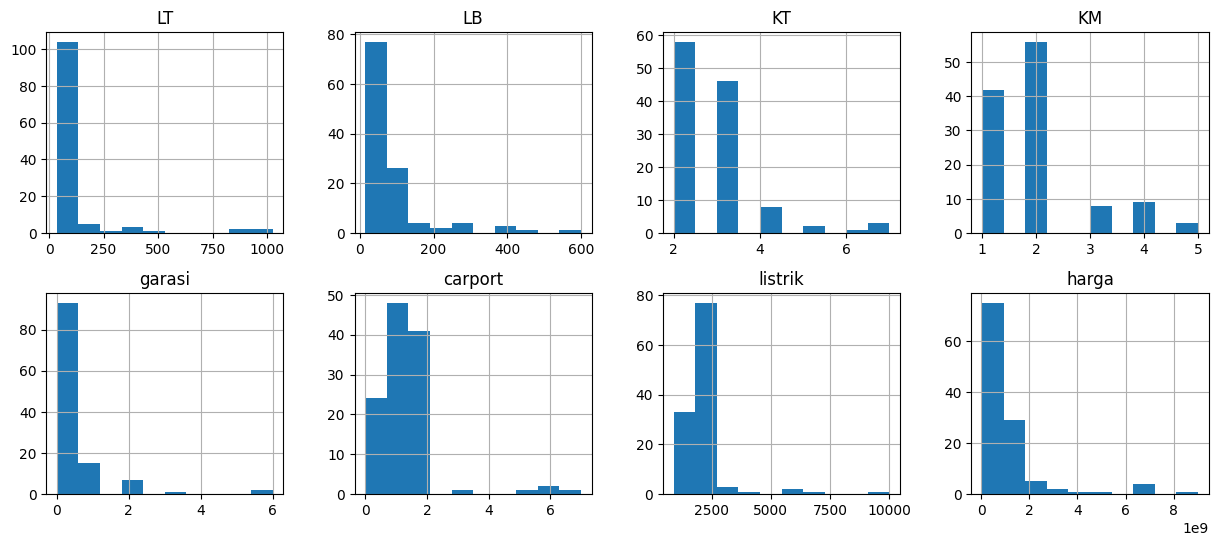

In [ ]:
dfD[num_var.columns].hist(figsize=(15, 6), layout=(2, 4));

Dari visualisasi di atas dipeoleh bahwa rumah yang dijual di kota depok:
1. Memiliki luas tanah berkisar dari puluhan hingga ribuan meter persegi.
2. Memiliki luas bangunan berkisar dari puluhan hingga ratusan meter persegi.
3. Memiliki jumlah kamar tidur 2 s.d. 7 kamar
4. Memiliki jumlah kamar mandi 1 s.d. 5 kamar mandi
5. Memiliki jumlah kapasitas garasi dari 0 s.d. 6
6. Memiliki jumlah kapasitas carport dari 0 s.d. 7
7. Memiliki daya listrik 900 s.d. 10000
8. Memiliki harga kisaran puluhan juta hingga miliyar

Melihat harga rata-rata rumah per lokasi (kecamatan)

In [ ]:
harga_per_kecamatan = dfD_Clean.groupby('lokasi')['harga'].mean().reset_index()
harga_per_kecamatan

<ipython-input-192-87a02996364f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  harga_per_kecamatan = dfD_Clean.groupby('lokasi')['harga'].mean().reset_index()


,lokasi,harga
0,Beji,1052000000.0
1,Bojong Sari,548000000.0
2,Cilodong,638333333.333333
3,Cimanggis,842958333.333333
4,Cinere,1640000000.0
5,Cipayung,311111111.111111
6,Limo,650000000.0
7,Pancoran Mas,1019000000.0
8,Sawangan,670366666.666667
9,Sukmajaya,970875000.0


<ipython-input-193-48c0de18aed7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  harga_per_kecamatan = dfD_Clean.groupby('lokasi')['harga'].mean().reset_index()


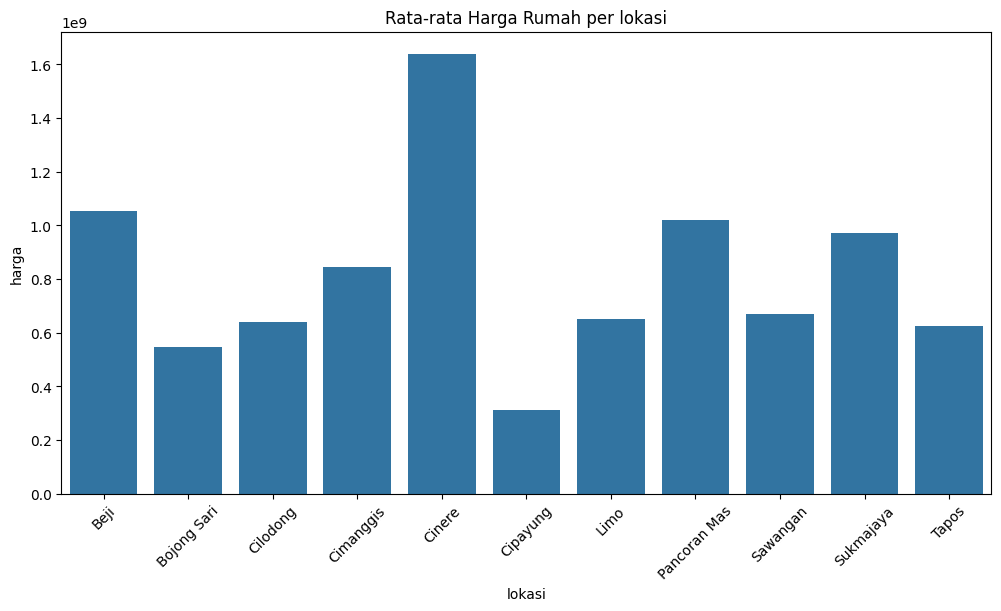

In [ ]:
# Menghitung rata-rata harga rumah per lokasi
harga_per_kecamatan = dfD_Clean.groupby('lokasi')['harga'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='lokasi', y='harga', data=harga_per_kecamatan)
plt.title('Rata-rata Harga Rumah per lokasi')
plt.xticks(rotation=45)
plt.show()

Gambar visualisasi diatas menunjukan bahwa kecamatan Cinere memiliki rata-rata harga rumah yang paling tinggi diatara kecamatan lainnya dan kecamatan Cipayung memiliki rata-rata harga yang cukup rendah dibandikan kecamatan lainnya.

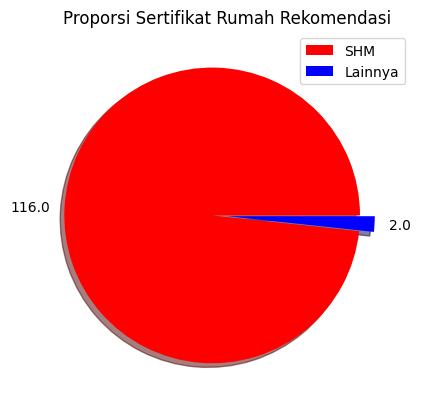

In [ ]:
from collections import Counter
data = dfD['sertifikat']
proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r','b']
labels = proporsion.keys()
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Sertifikat Rumah Rekomendasi')
plt.legend(labels, loc='best')
plt.show()

Dari visualisasi diatas terlihat bahwa hampir seluruh rumah yang dijual di kota depok memiliki sertifikat 'SHM'

## Rekomendasi rumah kota depok

Banyaknya rekomendasi rumah yang dapat dibeli dengan modal 25 miliar dengan kriteria tertentu.

In [ ]:
# Anggaran
anggaran = 25000000000

# Urutkan rumah berdasarkan harga terendah
rumah_terurut = dfD_Clean.sort_values('harga')

# Menghitung total kumulatif harga
rumah_terurut['total_kumulatif'] = rumah_terurut['harga'].cumsum()

# Filter rumah berdasarkan syarat minimal 2 kamar tidur, 1 kamar mandi, memiliki garasi atau carport, dan bersertifikat SHM
rumah_terurut = rumah_terurut[(rumah_terurut['KT'] >= 2) &
                              (rumah_terurut['KM'] >= 1) &
                              ((rumah_terurut['garasi'] >= 1) | (rumah_terurut['carport'] >= 1)) &
                              (rumah_terurut['sertifikat']=='SHM')]

# Filter rumah yang total kumulatif harganya masih di bawah atau sama dengan anggaran
rumah_dibeli = rumah_terurut[rumah_terurut['total_kumulatif'] <= anggaran]

# Jumlah rumah yang dapat dibeli
rumah_terbeli = len(rumah_dibeli)

# Total harga rumah yang dapat dibeli
total_harga = rumah_dibeli['harga'].sum()

# Output
print(f"Jumlah rumah yang dapat dibeli (direkomendasikan): {rumah_terbeli}")
print(f"Total harga: Rp {total_harga:,}")
print(f"Sisa anggaran: Rp {anggaran - total_harga:,}")

# Menampilkan daftar kandidat rumah yang dapat dibeli
jumlah_rumah_rekomendasi = pd.DataFrame(rumah_dibeli, columns=['created_at','lokasi', 'harga', 'sertifikat', 'LT', 'LB', 'KM', 'KT', 'garasi', 'carport', 'listrik', 'URL','deskripsi','letak_kota'])
jumlah_rumah_rekomendasi.reset_index(drop=True, inplace=True)
jumlah_rumah_rekomendasi


Jumlah rumah yang dapat dibeli (direkomendasikan): 40
Total harga: Rp 20,033,000,000
Sisa anggaran: Rp 4,967,000,000


,created_at,lokasi,harga,sertifikat,LT,LB,KM,KT,garasi,carport,listrik,URL,deskripsi,letak_kota
0,2021-12-06,Cipayung,215000000,SHM,36,60,1,2,0,1,1300,https://www.rumah123.com/properti/depok/hos928...,Rumah baru dan ready di bojong gede tajur hala...,depok
1,2021-12-04,Sawangan,235000000,SHM,50,36,1,2,1,1,1300,https://www.rumah123.com/properti/depok/hos928...,Rumah paling murah di Depok,depok
2,2021-12-04,Sawangan,235000000,SHM,50,36,1,2,1,1,1300,https://www.rumah123.com/properti/depok/hos851...,Rumah sawangan depok,depok
3,2021-12-05,Sawangan,250000000,SHM,50,36,1,2,0,1,1300,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Depok,depok
4,2021-12-06,Sawangan,250000000,SHM,50,36,1,2,0,1,1300,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,depok
5,2021-12-05,Sawangan,280000000,SHM,60,40,1,2,0,1,1300,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,depok
6,2021-12-04,Sawangan,335000000,SHM,66,45,1,2,1,1,1300,https://www.rumah123.com/properti/depok/hos928...,Rumah murah di Depok,depok
7,2021-12-05,Sawangan,350000000,SHM,71,45,1,2,1,1,1300,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,depok
8,2021-12-05,Sawangan,350000000,SHM,45,71,1,2,0,1,1300,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,depok
9,2021-12-06,Sawangan,350000000,SHM,72,45,1,2,0,1,1300,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,depok


In [ ]:
jumlah_rumah_rekomendasi['sertifikat'].value_counts()

,count
sertifikat,
SHM,40
Lainnya,0


Kecamatan terbanyak yang memiliki kandidat rumah yang dapat direkomendasikan

In [ ]:
jumlah_rumah_rekomendasi['lokasi'].value_counts()

,count
lokasi,
Sawangan,14
Cimanggis,9
Cipayung,5
Sukmajaya,4
Tapos,4
Bojong Sari,1
Cilodong,1
Limo,1
Pancoran Mas,1


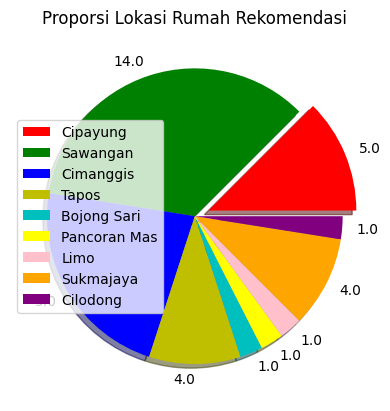

In [ ]:
from collections import Counter
data = jumlah_rumah_rekomendasi['lokasi']
proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y', 'c', 'yellow', 'pink', 'orange', 'purple']
labels = proporsion.keys()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Lokasi Rumah Rekomendasi')
plt.legend(labels, loc='best')
plt.show()

Viasualisasi diatas menunjukan bahwa kecamatan sawangan merupakan kecamatan yang memiliki jumlah rumah yang dapat direkomendasikan terbanyak diantara kecamatan lainnya.

Alasan merekomendasikan rumah-rumah diatas karena:
1. Rumah-rumah tersebut memiliki kriteria yang memiliki fasilitas kamar tidur dan kamar mandi sedikitnya cukup untuk 1 keluarga kecil dengan tambahan fasilitas garasi ataupun carport dengan harga yang diurutkan dari yang termurah dan semuanya sudah bersertifikat 'SHM' (sertifikat hak milik) sehingga ada kemungkinan rumah-rumah termasuk dengan kriteria yang dicari beberapa golongan masyarakat.
2. Rumah-rumah tersebut terletak di kecamatan-kecamatan yang terdapat fasilitas umum seperti sekolah, fasilitas kesehatan, dan untuk transportasi umum masih dapat dijangkau dengan mudah yang dapat meningkatkan harga jual.
3. Dengan meinvestasikan uang senilai 25 miliyar dapat memperoleh sekitar 40 rumah di kota depok.

# Olahan Data Gabungan

In [ ]:
DFJ_Clean = dfJ_Clean[:]
DFB_Clean = dfB_Clean[:]
DFD_Clean = dfD_Clean[:]
DFX_Clean = dfX_Clean[:]
DFT_Clean = dfT_Clean[:]

DFJ_Clean['letak_kota'] = 'Jakarta'
DFB_Clean['letak_kota'] = 'Bogor'
DFT_Clean['letak_kota'] = 'Tangerang'

dataset = [DFJ_Clean, DFD_Clean, DFB_Clean, DFT_Clean, DFX_Clean]
for i, df in enumerate(dataset, start=1):
    if 'hadap' in df.columns:
      df.drop(columns='hadap', inplace=True)
    #print(dataset[i-1])
    print(df.shape)
    print(df.columns, '\n')

(105, 14)
Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'harga', 'URL', 'deskripsi', 'letak_kota'],
      dtype='object') 

(108, 14)
Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'harga', 'URL', 'deskripsi', 'letak_kota'],
      dtype='object') 

(185, 14)
Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'harga', 'URL', 'deskripsi', 'letak_kota'],
      dtype='object') 

(114, 14)
Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'harga', 'URL', 'deskripsi', 'letak_kota'],
      dtype='object') 

(100, 14)
Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'harga', 'URL', 'deskripsi', 'letak_kota'],
      dtype='object') 



<ipython-input-199-8c31d86b4050>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFJ_Clean['letak_kota'] = 'Jakarta'
<ipython-input-199-8c31d86b4050>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFB_Clean['letak_kota'] = 'Bogor'
<ipython-input-199-8c31d86b4050>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
DF_Semua = pd.concat(dataset, ignore_index=True)


In [ ]:
DF_Semua.sample(5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,letak_kota
20,2021-12-06 00:00:00,390,200,7,2,0,1,Jakarta Selatan,SHM,1300,3500000000,https://rumahdijual.com/tebet/11220328-dijual-...,Bangunan lama,Jakarta
213,2021-12-03 00:00:00,75,38,2,1,1,1,Bojonggede,SHM,1300,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",Bogor
540,06-12-2021,110,135,3,2,0,1,Kota Bekasi,SHM,2200,1175000000,https://www.99.co/id/properti/rumah-siap-huni-...,Rumah cantik sangat siap huni dg kondisi teraw...,Bekasi
167,2021-12-05 00:00:00,77,60,2,2,0,2,Cilodong,SHM,2200,720000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Keren 2 Lantai Banyak Bonus di Jl.Mandor...,depok
84,2021-12-06 00:00:00,317,200,4,2,0,2,Jakarta Timur,SHM,2200,3500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah Siap Huni, Luas & Asri. Akses 2 Mobil. L...",Jakarta


In [ ]:
DF_Semua.iloc[:, 1:7].mode()

,LT,LB,KT,KM,garasi,carport
0,60,36,2,2,0,1


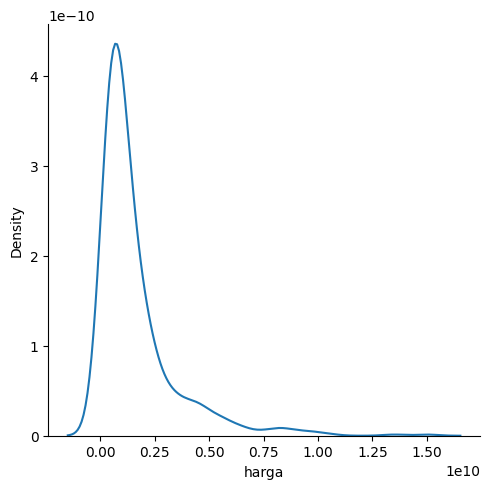

In [ ]:
sns.displot(data=DF_Semua, x=col, kind='kde')

<ipython-input-204-62031cda06ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="letak_kota", y="harga", data=DF_Semua, palette='rainbow')


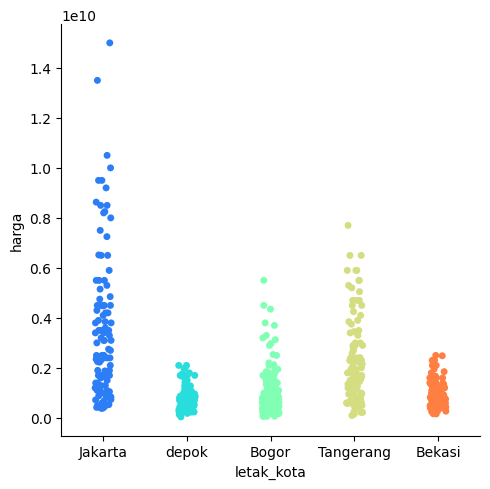

In [ ]:
sns.catplot(x="letak_kota", y="harga", data=DF_Semua, palette='rainbow')
plt.show()

# Insight

## Kualitas Data Perusahaan




* Data memiliki banyak sekali missing value yang bahkan melebihi 50% data valid
* Inkosistensi satuan harga di berbagai data kota
* Terdapat keterangan variabel di dalam beberapa dataset
* Kurangnya keterangan dan penjelasan pada masing-masing variabel (harusnya di LB diberitahu terdapat berapa lantai)



## Saran perbaikan data


Saran untuk DE/DBA perusahaan agar dapat melakukan hal-hal berikut:
* Perbaiki penggunaan satuan harga, jika memang ingin dalam jutaan ya gunakan banyak nol yang tepat
* Keterangan variabel sebaiknya jangan berada di dalam dataset
* Beri penjelasan total lantai pada masing-masing rumah
* Lakukan survey rumah-rumah yang masih banyak terdapat missing valuenya, sehingga data memiliki informasi yang lengkap dan akurat



## Kencenderungan harga rumah-rumah lebih mahal di suatu kota

<ipython-input-205-62031cda06ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="letak_kota", y="harga", data=DF_Semua, palette='rainbow')


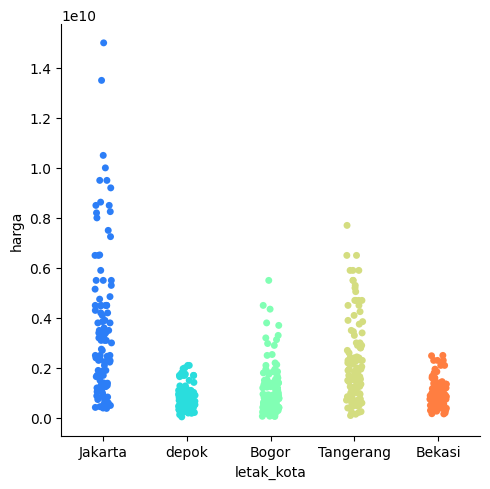

In [ ]:
sns.catplot(x="letak_kota", y="harga", data=DF_Semua, palette='rainbow')
plt.show()

In [ ]:
for i, df in enumerate(dataset, start=1):
  print('rata-rata harga rumah di kota ', df['letak_kota'][0], ':', f"Rp {df['harga'].mean():,.2f}")

rata-rata harga rumah di kota  Jakarta : Rp 3,607,719,543.36
rata-rata harga rumah di kota  depok : Rp 805,962,962.96
rata-rata harga rumah di kota  Bogor : Rp 915,117,699.25
rata-rata harga rumah di kota  Tangerang : Rp 2,255,657,894.74
rata-rata harga rumah di kota  Bekasi : Rp 969,160,990.00


Dari plot di atas dan dari kesimpulan setelah proses EDA nampak bahwa rata-rata harga rumah-rumah di **Jakarta** cenderung lebih mahal. Hal ini disebabkan karena Jakarta memiliki lokasi strategis dan merupakan pusat ekonomi di Indonesia. (plot diatas diambil dari data yang sudah dilakukan Preprocessing).


Sementara itu, rumah-rumah di **Bekasi** dan **Depok** memiliki rata-rata harga yang lebih murah dibandingkan kota lainnya. Faktor-faktor yang menyebabkan hal ini adalah kedua kota ini berada di luar pusat ekonomi utama Jakarta dan sering mengalami kemacetan yang menurunkan daya tarik dan harga properti dibandingkan daerah dengan akses yang lebih mudah di Jakarta.

## Rekomendasi Kantor Cabang

MENGAPA HARUS BOGOR?
* hanya dalam kurun waktu satu minggu DBA berhasil mengumpulkan kurang lebih sebanyak 200 data valid rumah yang dijual, bayangkan jika pengumpulan data dilakukan dalam kurun waktu yang lebih lama.
* Rerata harga rumah di kota bogor berada di kisaran 725jt dengan harga max 1,28M nampak potensi untuk membeli rumah murah dengan potensi harga jual tinggi.
* kebanyakan LB < LT dengan rata2 sisa tanah sebesar 24,8 meter persegi (sudah kami olah di atas, bisa kami tunjukkan kapanpun). Artinya banyak rumah yang masih memiliki sisa tanah yang bisa dimanfaatkan untuk memperindah rumah dan menaikkan harga jual
* dari kurang lebih 200 data valid yang terkumpul hanya 5 rumah yang tidak memberi keterangan spesifik terkait sertifikat sertifikat rumah. ini merupakan yang terbaik jika dibandingkan dengan dataset di kota2 lain
* salah satu kota besar di indonesia memungkinkan untuk mendapatkan banyak pembeli
* akses wisata alam yang relatif dekat

## Rumah dengan karakteristik seperti apa yang paling banyak dijual?

* LT <= 150
* LB <= 100
* 2 <= KT <= 4
* KM <= 3
* 1 kapasistas carport
* 1 kapasistas garasi
* Jenis Sertifikat SHM

## Rekomendasi rumah-rumah yang dapat dibeli dengan total budget 25M dan berpotensi untuk dijual dengan harga lebih tinggi


In [ ]:
dfD_recommended = jumlah_rumah_rekomendasi[:]

DF_Rekomendasi = pd.concat([dfJ_recommend.loc[:4], dfX_Recom.head(3), dfD_recommended.loc[:10], dfB_recommended], axis=0, ignore_index=True)
DF_Rekomendasi

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,letak_kota,index
0,2021-11-06 00:00:00,90,36,1,2,0,1,Jakarta Utara,SHM,1300,tidak ada keterangan,498000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Di Jual Berkualitas Harga Terjangkau Cuk...,Jakarta,NaN
1,2021-11-25 00:00:00,86,45,2,1,1,1,Jakarta Timur,SHM,1300,tidak ada keterangan,690000000,https://www.rumah123.com/properti/jakarta-timu...,Rumah Cluster 1 lantai. 10 menit ke stasiun LR...,Jakarta,NaN
2,2021-12-02 00:00:00,511,463,6,3,1,0,Jakarta Selatan,SHM,33000,tidak ada keterangan,4480000000,https://rumahdijual.com/tebet/11748387-jual-ru...,- Pondasi dan konstruksi beton bertulang\n- Ku...,Jakarta,NaN
3,2021-11-29 00:00:00,147,82,3,3,0,1,Jakarta Barat,SHM,2200,tidak ada keterangan,2288809000,https://www.rumah.com/listing-properti/dijual-...,Fasilitas :\n- Club House dalam Cluster\n- 5 m...,Jakarta,NaN
4,2021-12-06 00:00:00,390,200,7,2,0,1,Jakarta Selatan,SHM,1300,tidak ada keterangan,3500000000,https://rumahdijual.com/tebet/11220328-dijual-...,Bangunan lama,Jakarta,NaN
5,06-12-2021,296,200,4,2,0,0,Kota Bekasi,SHM,5500,0,2300000000,https://www.rumah123.com/properti/bekasi/hos84...,"Rumah Hoek dalam cluster Aralia, Rumah hadap t...",Bekasi,16.0
6,08-12-2021,144,100,2,1,0,1,Kabupaten Bekasi,SHM,2200,Selatan,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...,Bekasi,3.0
7,03-12-2021,145,96,4,2,0,0,Kabupaten Bekasi,SHM,0,0,965000000,https://www.olx.co.id/item/dijual-rumah-murah-...,Dijual Rumah Murah di Perumahan Kirana Cibitun...,Bekasi,75.0
8,2021-12-06 00:00:00,36,60,2,1,0,1,Cipayung,SHM,1300,NaN,215000000,https://www.rumah123.com/properti/depok/hos928...,Rumah baru dan ready di bojong gede tajur hala...,depok,NaN
9,2021-12-04 00:00:00,50,36,2,1,1,1,Sawangan,SHM,1300,NaN,235000000,https://www.rumah123.com/properti/depok/hos928...,Rumah paling murah di Depok,depok,NaN


In [ ]:
f"Rp{DF_Rekomendasi['harga'].sum():,.2f}"

'Rp25,864,809,000.00'

Kami sertakan Dataframe yang berisi rumah-rumah yang memiliki potensi untuk dijual dengan harga lebih tinggi. hanya dengan bermodal sekitar 24,86 M perusahaan bisa mendaptkan untung bersih hampir 50% dari modal. dengan rincian sebagai berikut

1. BOGOR:
* rumah yang terdapat di bogor barat yang kami sarankan pada dataframe nampak memiliki potensi. dengan sisa luas tanah yang cukup besar bisa dimanfaatkan untuk menaikkan harga dengan cara membangun garasi atau menambah slot untuk parkir mobil, menambahkan satu kamar mandi atau hanya sekedar sedikit merenovasi. Juga dengan mengiklankan bahwasannya akses ke kota dan ke tempat transformasi umum lebih mudah dijangkau. akses ke berbagai tepat wisata alam juga relatif cukup dekat berdasarkan hasil analisa kami dengan begitu harga bisa naik sekitar 40% - 65%
* rumah yang berada di gunung putri bisa dijual sebgai villa dengan menambah jumlah kamar dan menambah slot untuk parkir mobil serta dengan sedikit renovasi memungkinkan harga rumah bisa naik hingga 25%


2. JAKARTA:
* Sebagai pusat bisnis, Jakarta memiliki perekonomian yang kuat, yang semakin diperkuat dengan infrastruktur yang terus berkembang, terutama dalam transportasi umum. Dengan melakukan renovasi seperti menambah jumlah kamar atau membangun garasi dari sisa tanah yang tersedia,  harga rumah dapat meningkat sehingga berpotensi menghasilkan keuntungan bagi perusahaan.

3. DEPOK:

* Depok menjadi pertimbangan menarik untuk menginvestasikan properti karena:
** Lokasinya yang strategis dekat Jakarta, Bogor, dan Tangerang, dan memiliki akses mudah ke pusat kota melalui tol dan transportasi umum seperti Commuter Line.
* Pertumbuhan ekonomi dan pembangunan infrastruktur yang pesat, termasuk jalan raya, transportasi umum, dan fasilitas publik, yang dapat dilihat dari instagram pemerintah kota depok, hal inisemakin meningkatkan daya tariknya.
* Permintaan properti tinggi, terutama bagi masyarakat yang bekerja di Jakarta namun ingin tinggal di lingkungan yang tidak sepadat Jakarta dengan harga yang lebih murah, Depok dapat menjadi pilihan yang menarik untuk dijadikan tempat tinggal.
* Depok juga merupakan pusat pendidikan dengan Universitas Indonesia, serta berdasarkan data BPS kecamatan-kecamatan diatas sudah memikiki fasilitas pendidikan dari jenjang SD s.d. SMA baik negeri maupun swasta yang dapat menjadi salah satu pertimbangan dalam membeli rumah.

### Bekasi

Tanah yang kami rekomendasikan berada di lingkungan perumahan yang rapi dan tentram, ideal bagi mereka yang mencari suasana yang tidak ramai. Perumahan ini menawarkan lingkungan yang nyaman dan minim kebisingan, menjadikannya tempat tinggal yang cocok untuk Anda yang mengutamakan ketenangan.

Selain itu, tanah-tanah yang tersedia memiliki kelebihan lahan yang luas. Lahan tambahan ini memungkinkan pemilik untuk memanfaatkannya sesuai kebutuhan, seperti membangun garasi yang luas atau taman mini. Ini tentu akan memberikan nilai tambah bagi penghuni serta meningkatkan potensi investasi properti di masa depan. Dari sudut pandang bisnis, ini juga menawarkan keuntungan lebih bagi perusahaan properti yang menyediakan tanah tersebut, karena daya tarik lingkungan yang eksklusif dan peluang pengembangan yang fleksibel.